<a href="https://colab.research.google.com/github/sharonma1218/stats-306/blob/main/lab05_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5

In [1]:
install.packages("carData")
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
options(warn=-1)
library(ggplot2)
library(tidyverse)
library(gridExtra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   1.0.1      

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




## Review Aesthetics Mapping
Aesthetic mappings describe how variables in the data are mapped to geometric objects (geom_bar, geom_histogram, etc ...) in the plot. Through our choices for aesthetic mappings we are able to to highlight patterns in our data set that may not have been clear before.

In [3]:
data(Salaries, package="carData")

In [4]:
head(Salaries)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
,<fct>,<fct>,<int>,<int>,<fct>,<int>
1,Prof,B,19,18,Male,139750
2,Prof,B,20,16,Male,173200
3,AsstProf,B,4,3,Male,79750
4,Prof,B,45,39,Male,115000
5,Prof,B,40,41,Male,141500
6,AssocProf,B,6,6,Male,97000


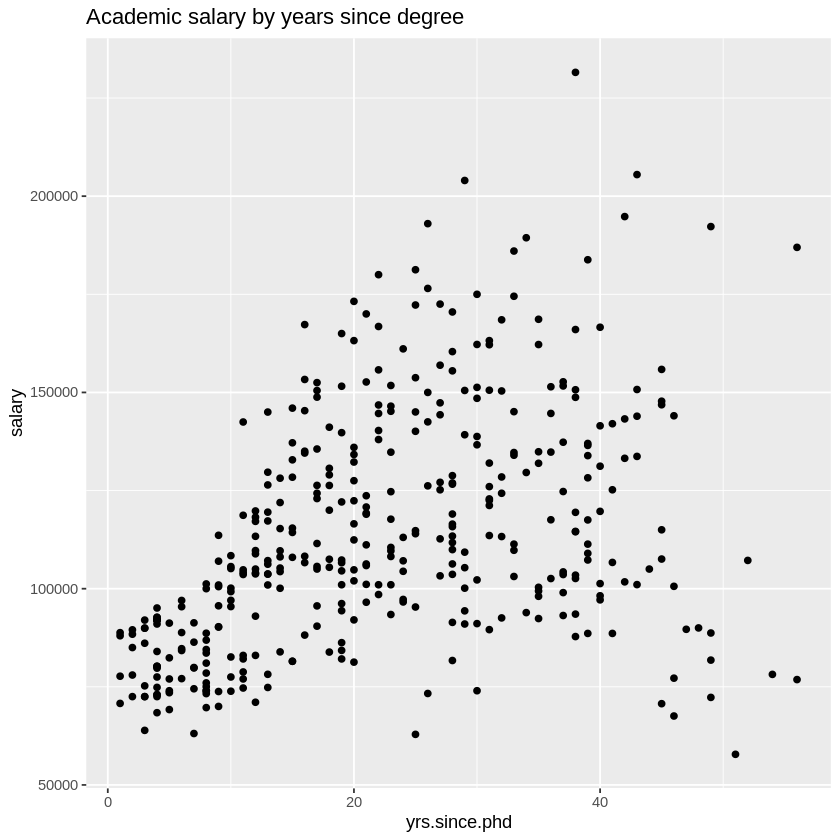

In [5]:
ggplot(Salaries, 
       aes(x = yrs.since.phd, 
           y = salary)) +
  geom_point() + 
  labs(title = "Academic salary by years since degree")

#### How can we make this plot more informative?

* **color**: good for both discrete and continuous variables. Need to know the difference.
* **size**: maybe more suiitable for continuous variables.
* **alpha**: maybe more suiitable for continuous variables.
* **shape**: can only be applied to discrete variables, normally with category $\leq$ 6.

Note: these are not definite rules.

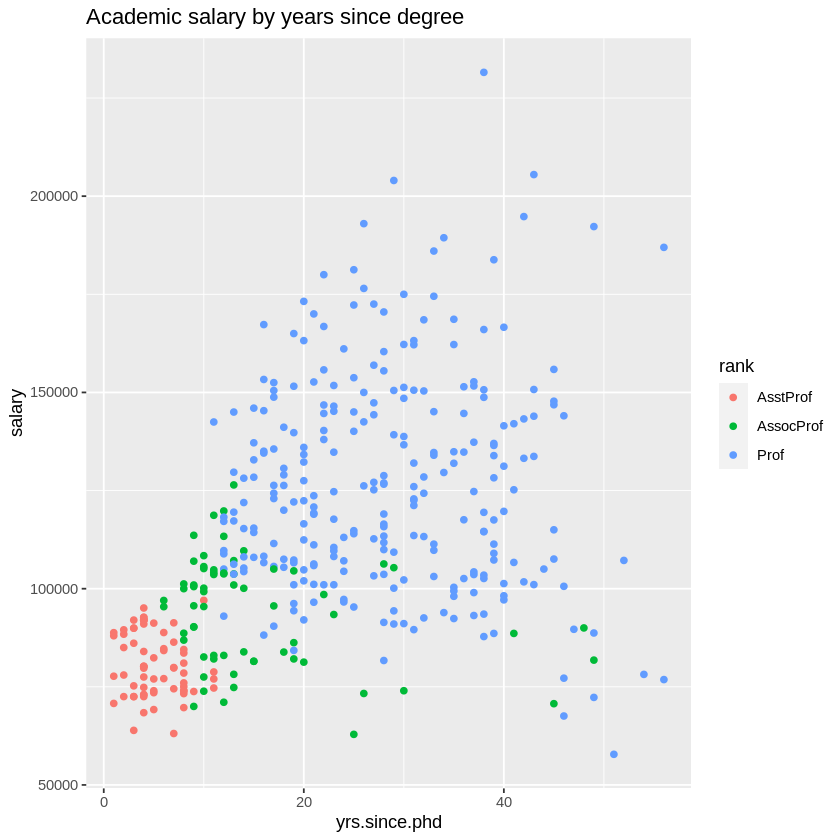

In [9]:
ggplot(Salaries, 
       aes(x = yrs.since.phd, 
           y = salary,
           color=rank)) +
  geom_point() + 
  labs(title = "Academic salary by years since degree")

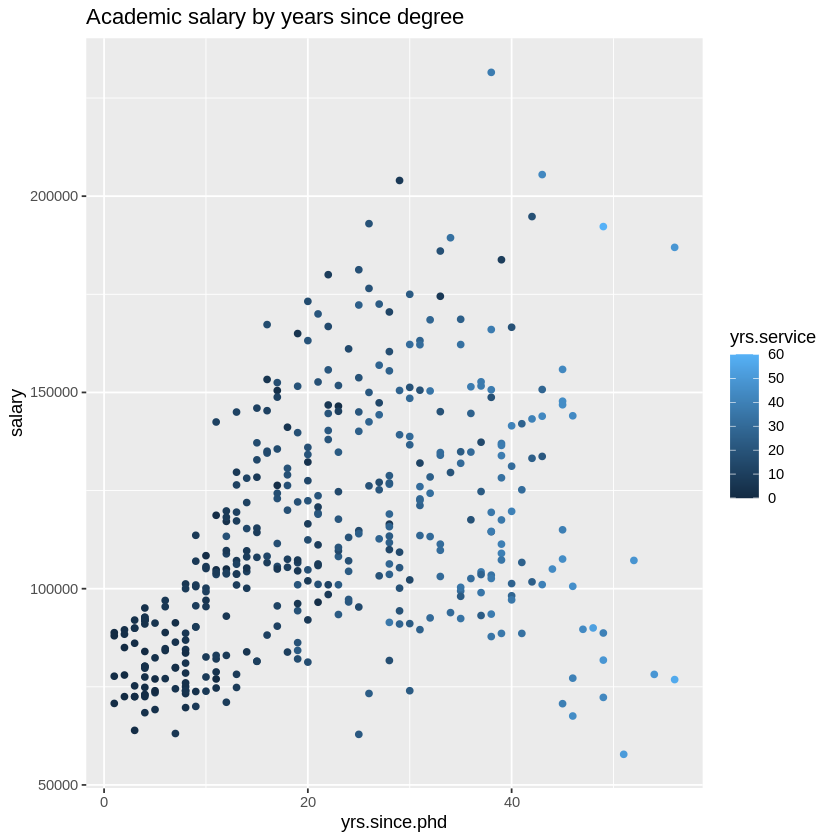

In [8]:
ggplot(Salaries, 
       aes(x = yrs.since.phd, 
           y = salary,
           color=yrs.service)) +
  geom_point() + 
  labs(title = "Academic salary by years since degree")

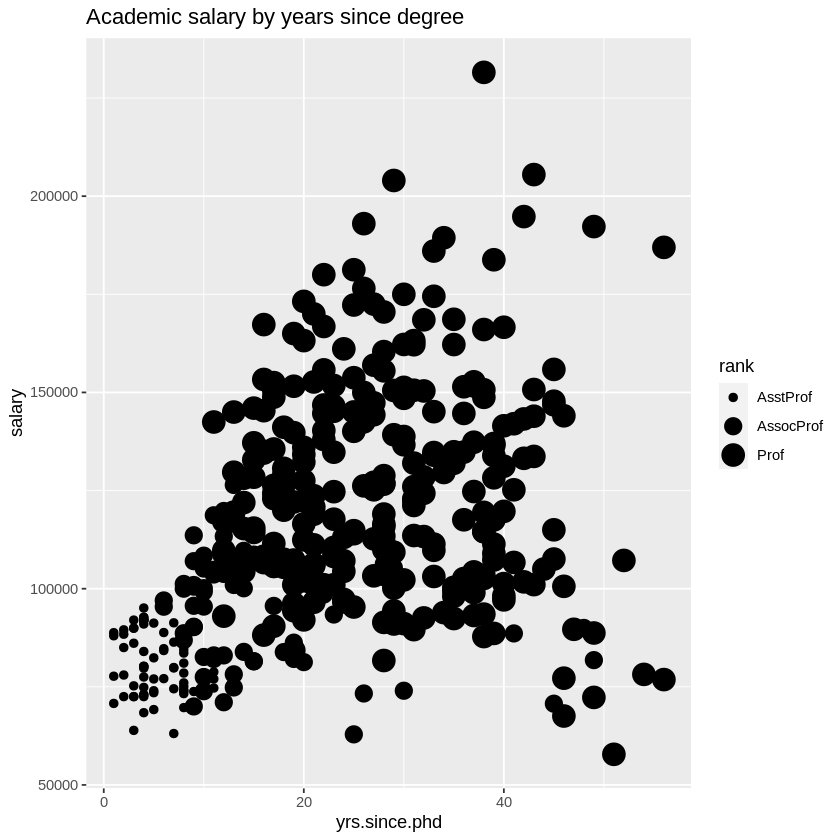

In [10]:
ggplot(Salaries, 
       aes(x = yrs.since.phd, 
           y = salary,
           size=rank)) +
  geom_point() + 
  labs(title = "Academic salary by years since degree")

We were able to change the color, size, and transparency of our scatter 
plot using different variables in our data. These choices will depend on the specific data analysis but there are some considerations to keep in mind when making these choices.

Some aesthetic mappings are more suitable for continous or ordinal variables while others are better suited for 
discrete categorical variables.

For example, using a discrete variable such as $\textit{rank}$ for $\textit{alpha}$ (transparency) or 
$\textit{size}$ would not make sense since changes in size and transperency would have no signifance. On the otherhand, one wouldn't want to use a continuous variable such a $\textit{price}$ for an aesthetics mapping such as $\textit{shape}$ since there are a small number of shape types available in ggplot.

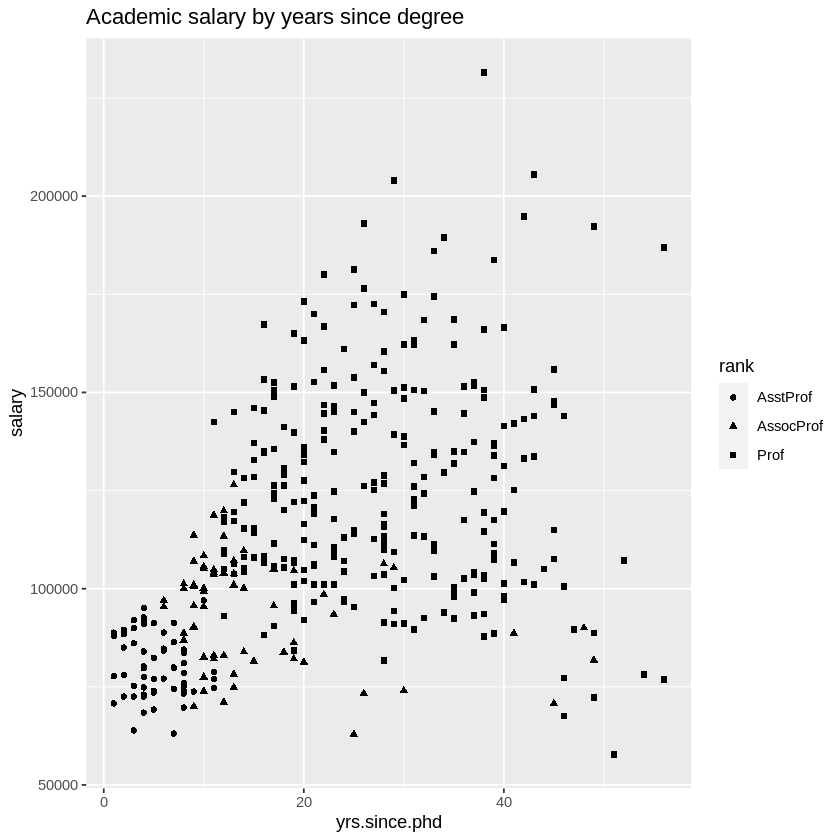

In [11]:
ggplot(Salaries, 
       aes(x = yrs.since.phd, 
           y = salary,
           shape=rank)) +
  geom_point() + 
  labs(title = "Academic salary by years since degree")

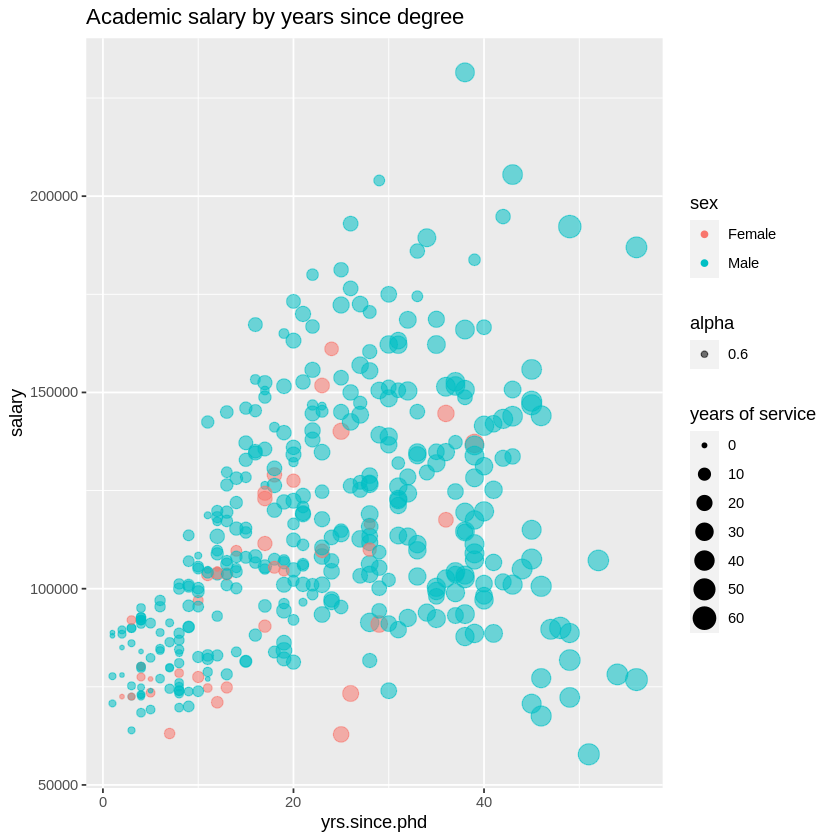

In [16]:
ggplot(Salaries, 
       aes(x = yrs.since.phd, 
           y = salary,
           color = sex,
           size = yrs.service,
           alpha=0.6)) + # if you want things to be included in the legend, include it inside the aes 
  geom_point() + 
  labs(title = "Academic salary by years since degree",
  size = "years of service") # how to change the title of the legend for size=yrs.service 

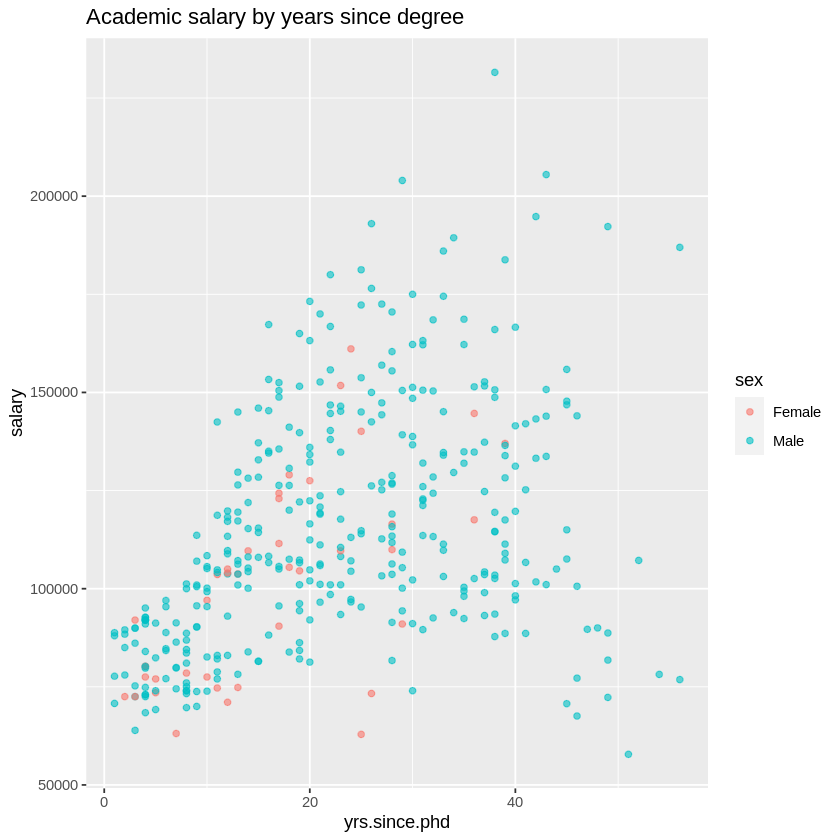

In [17]:
ggplot(Salaries, 
       aes(x = yrs.since.phd, 
           y = salary,
           color = sex,
           alpha = yrs.service)) + 
  geom_point(alpha=0.6) + # putting alpha argument here overrides the argument above 
  labs(title = "Academic salary by years since degree",
  size = "years of service") 

#### Exercise 1: 
Create a scatter plot of $\textit{salary}$ vs $\textit{yrs.since.phd}$ where color is determined by sex. Include a best fit line for sex.

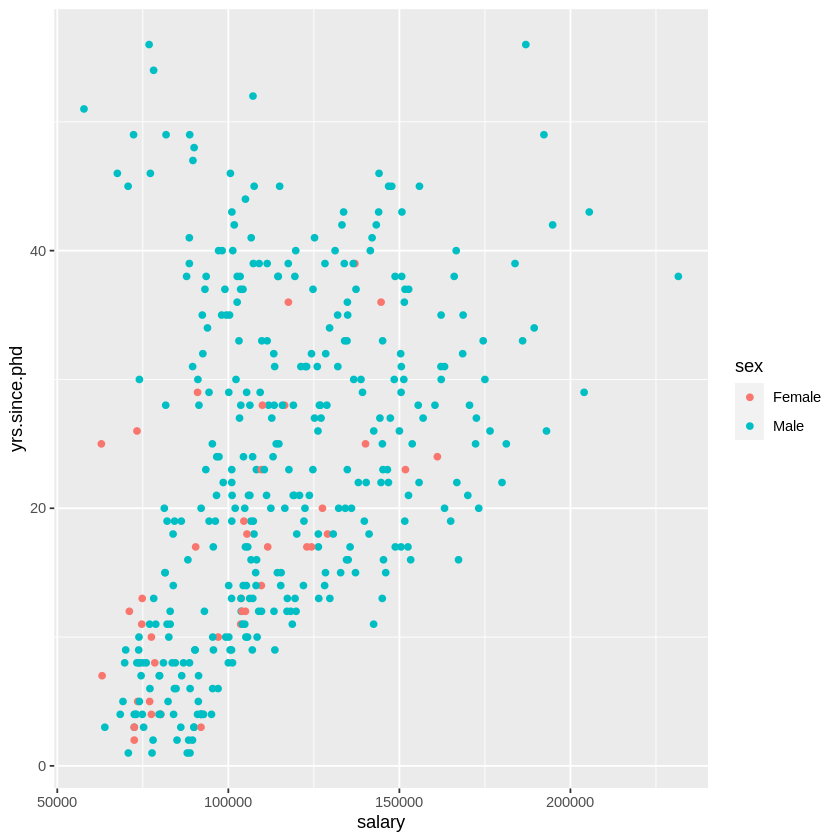

In [23]:
#@title Answer to Exercise 1
ggplot(data=Salaries,aes(x=salary,y=yrs.since.phd,color=sex))+
  geom_point()

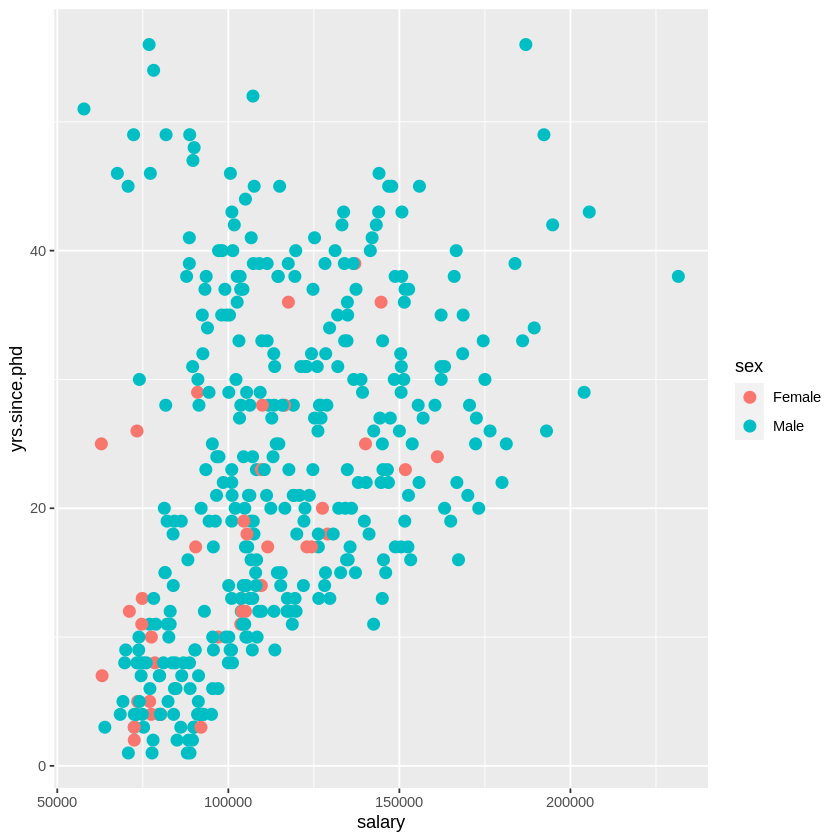

In [24]:
ggplot(data=Salaries,aes(x=salary,y=yrs.since.phd,color=sex))+
  geom_point(size=3)

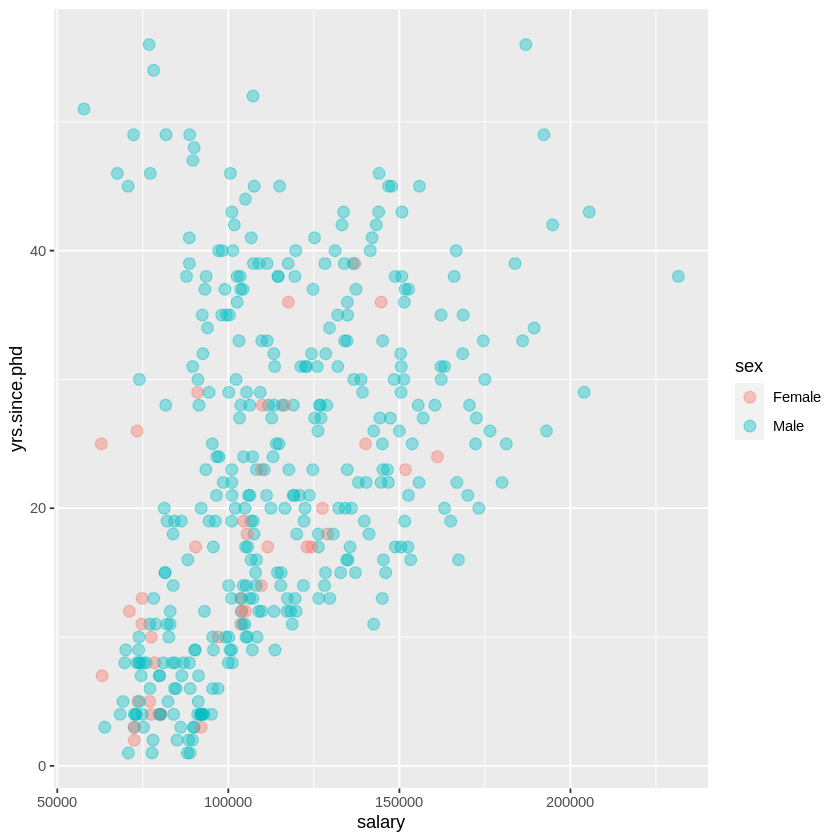

In [25]:
ggplot(data=Salaries,aes(x=salary,y=yrs.since.phd,color=sex))+
  geom_point(size=3,alpha=0.4)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


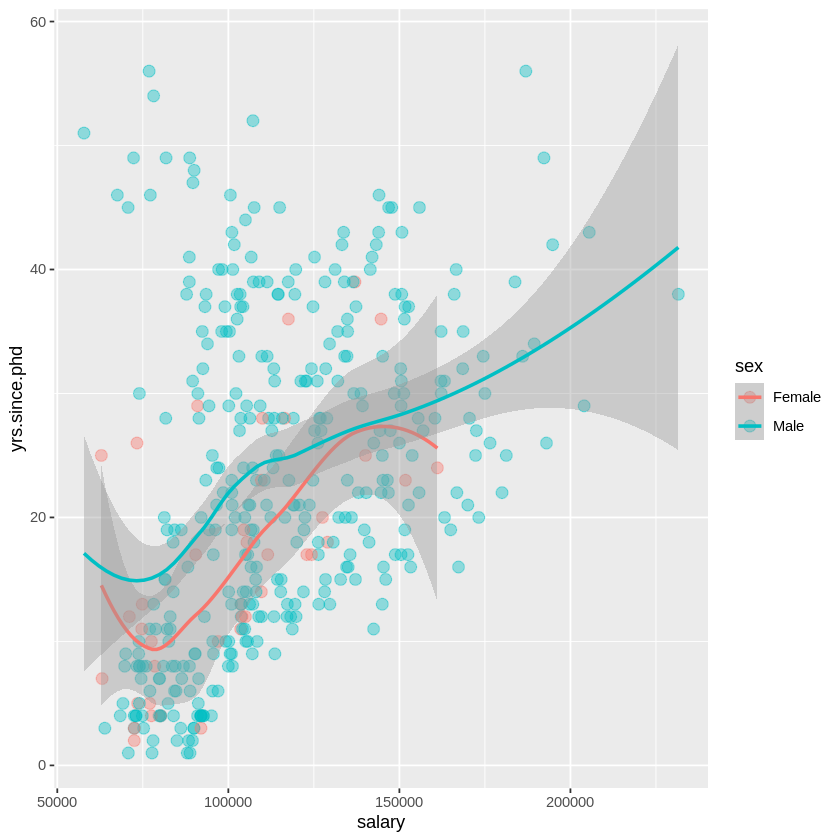

In [26]:
ggplot(data=Salaries,aes(x=salary,y=yrs.since.phd,color=sex))+
  geom_point(size=3,alpha=0.4)+
  geom_smooth()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


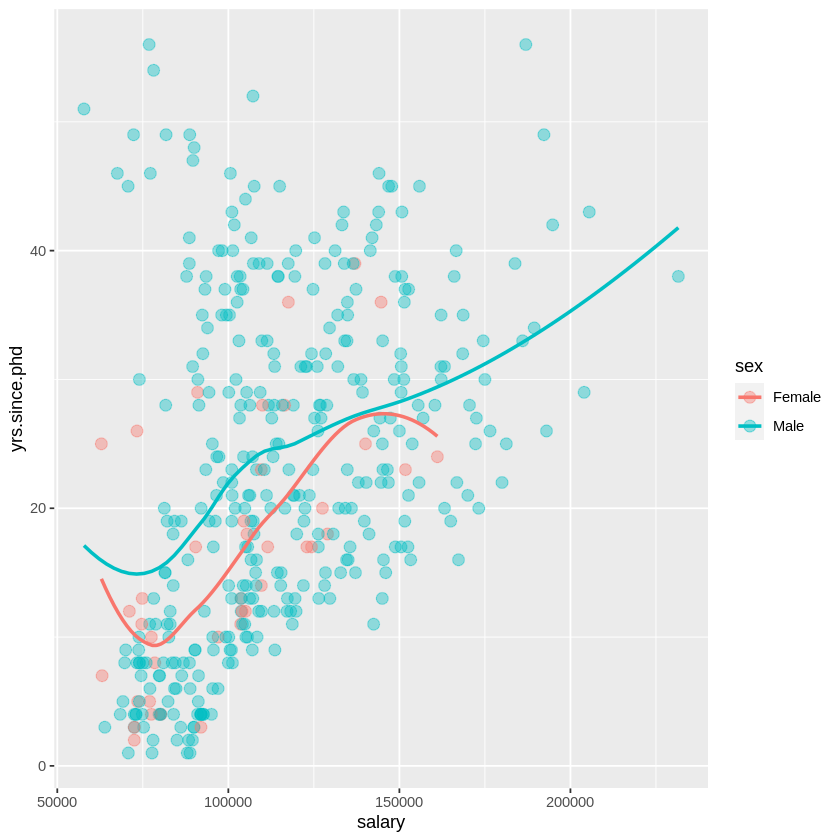

In [27]:
ggplot(data=Salaries,aes(x=salary,y=yrs.since.phd,color=sex))+
  geom_point(size=3,alpha=0.4)+
  geom_smooth(se=FALSE) # how to get rid of the standard error/confidence interval 

## Exploratory Data Analysis

The goal during EDA is to develop an understanding of your data. Some types of questions can be useful for making discoveries within your data. (We use `diamonds` dataset as an example here for EDA.)

* What type of variation occurs within my variables?
* What type of covariation occurs between my variables?

In [28]:
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


### Variation
Variation is the tendency of the values of a variable to change from measurement to measurement. The best way to understand that pattern is to visualize the distribution of the variable’s values. 

**Typical Values and Unusual Values** can be two important aspects to start.

**1. Typical Values**

As an example, the histogram below suggests that there are more diamonds with price around $1000.

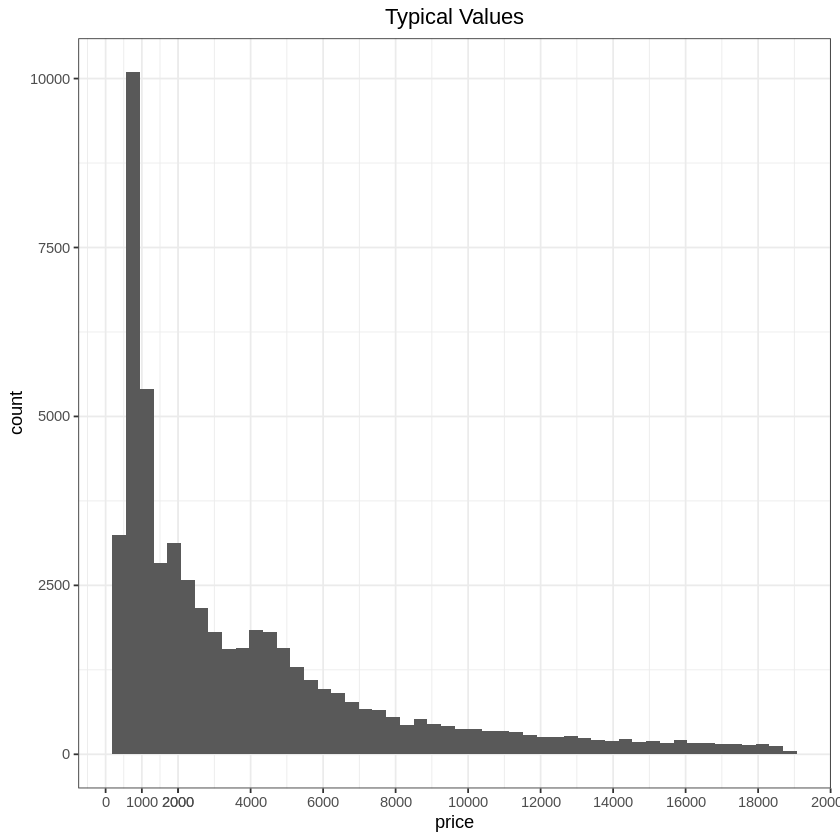

In [29]:
ggplot(diamonds) + 
  geom_histogram(aes(price), bins = 50) +
  # notice how you can change your axis breaks
  scale_x_continuous(breaks = c(0,1000,2000,seq(2000,20000,2000))) + 
  ggtitle("Typical Values") +
  theme_bw() + 
  # notice how you can put your title in the middle
  theme(plot.title = element_text(hjust = 0.5))

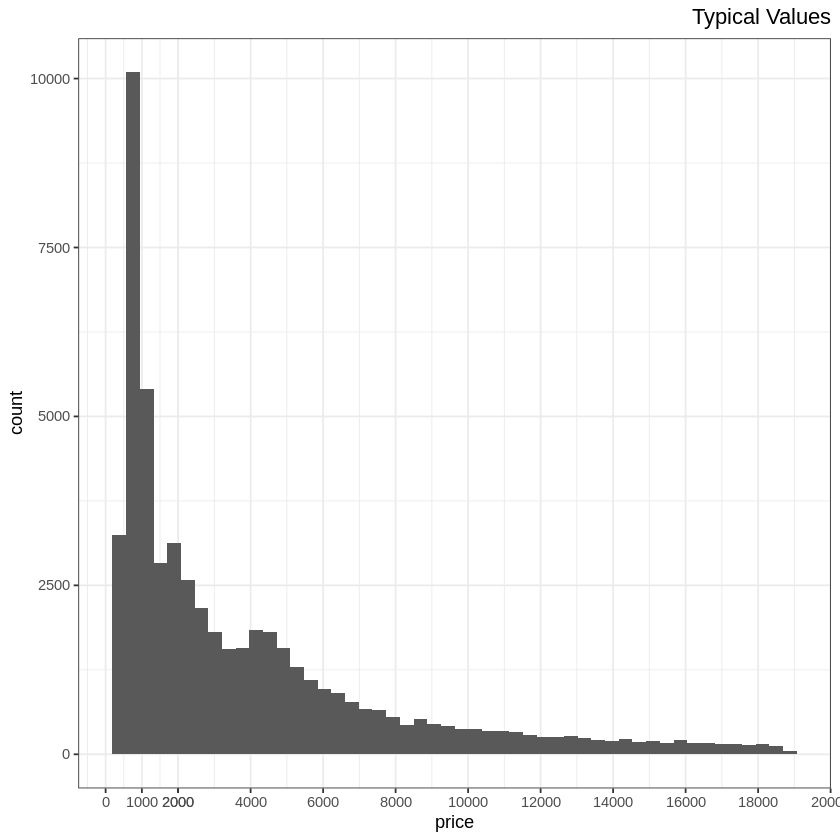

In [30]:
ggplot(diamonds) + 
  geom_histogram(aes(price), bins = 50) +
  # notice how you can change your axis breaks
  scale_x_continuous(breaks = c(0,1000,2000,seq(2000,20000,2000))) + 
  ggtitle("Typical Values") +
  theme_bw() + 
  theme(plot.title = element_text(hjust = 1)) # puts title on the right 

**2. Unusual Values**

Outliers are observations that are unusual; data points that don’t seem to fit the pattern. Sometimes outliers are data entry errors; other times outliers suggest important new science. See an example below: 

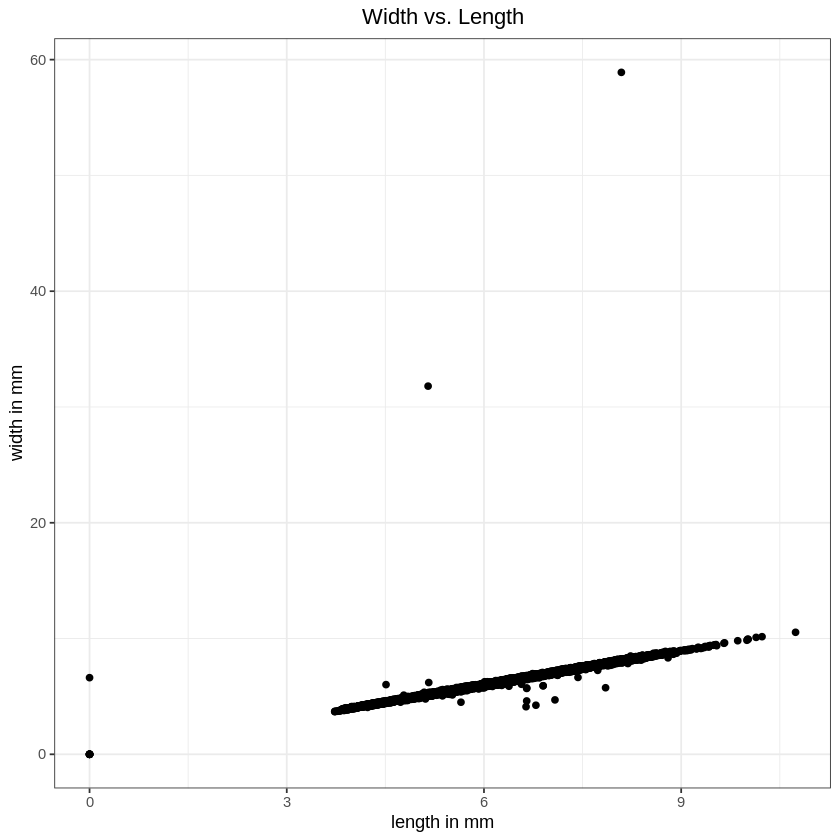

In [31]:
ggplot(diamonds, aes(x = x, y = y)) + 
  geom_point() +
  labs(x = "length in mm", y = "width in mm") +
  ggtitle("Width vs. Length") +
  theme_bw() + 
  theme(plot.title = element_text(hjust = 0.5)) # there are 4 outliers 

When you have a lot of data, outliers are sometimes difficult to see in a histogram. 

For example, take the distribution of the y variable from the diamonds dataset. The only evidence of outliers is the unusually wide limits on the x-axis.

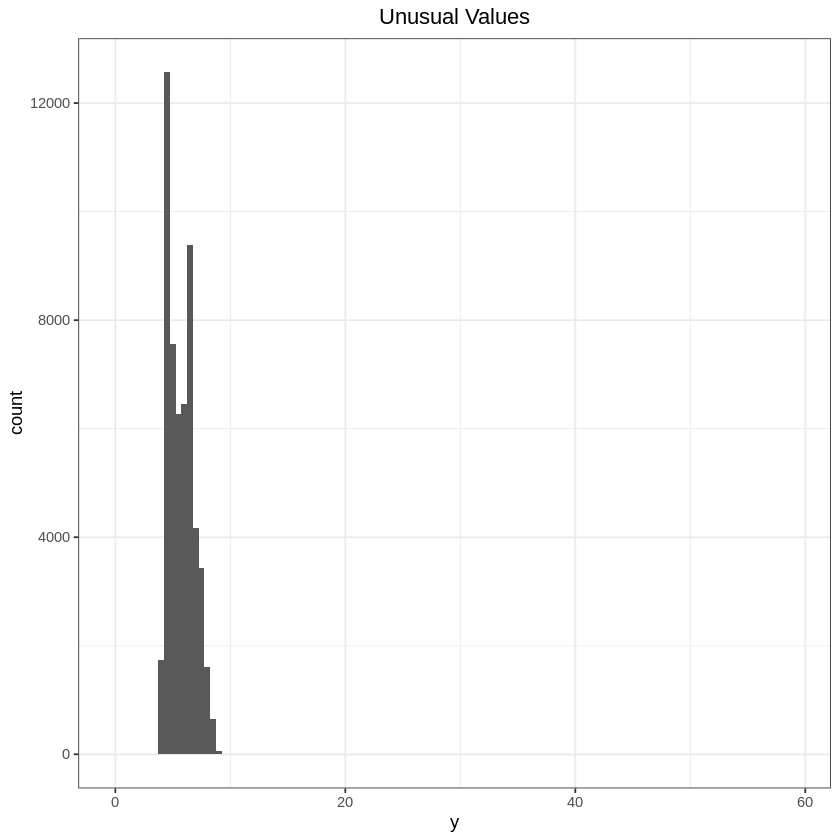

In [32]:
ggplot(diamonds, aes(x = y)) + 
  geom_histogram(binwidth = 0.5) +
  ggtitle("Unusual Values") +
  theme_bw() + 
  theme(plot.title = element_text(hjust = 0.5))

There are so many observations in the common bins that the rare bins are very short, making it very difficult to see them.

One way to solve it is zooming to small values of the y-axis with `coord_cartesian()`.

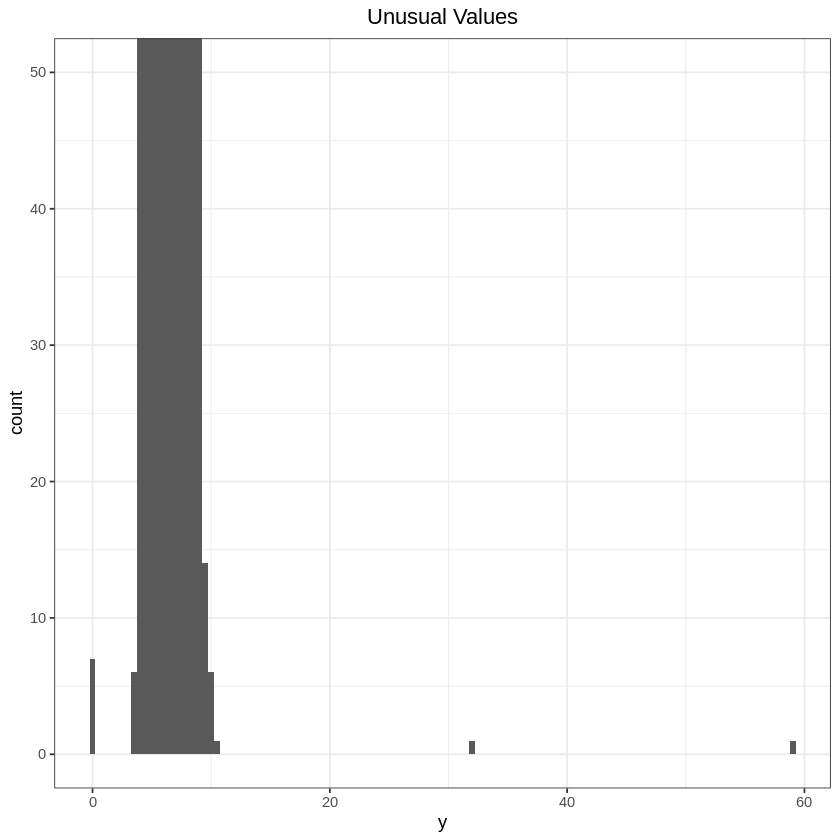

In [33]:
ggplot(diamonds, aes(x = y)) + 
  geom_histogram(binwidth = 0.5) +
  coord_cartesian(ylim = c(0, 50)) + # zooms into plot 
  ggtitle("Unusual Values") +
  theme_bw() +  
  theme(plot.title = element_text(hjust = 0.5))

### Covariation
Covariation is the tendency for the values of two or more variables to vary together in a related way. The best way to spot covariation is to visualize the relationship between two or more variables. 

**1. A categorical and a numerical variable**

Histograms `geom_histogram()` display the counts with bars

Frequency polygons `geom_freqpoly()` display the counts with lines. Frequency polygons are more suitable when you want to compare the distribution across the levels of a categorical variable.

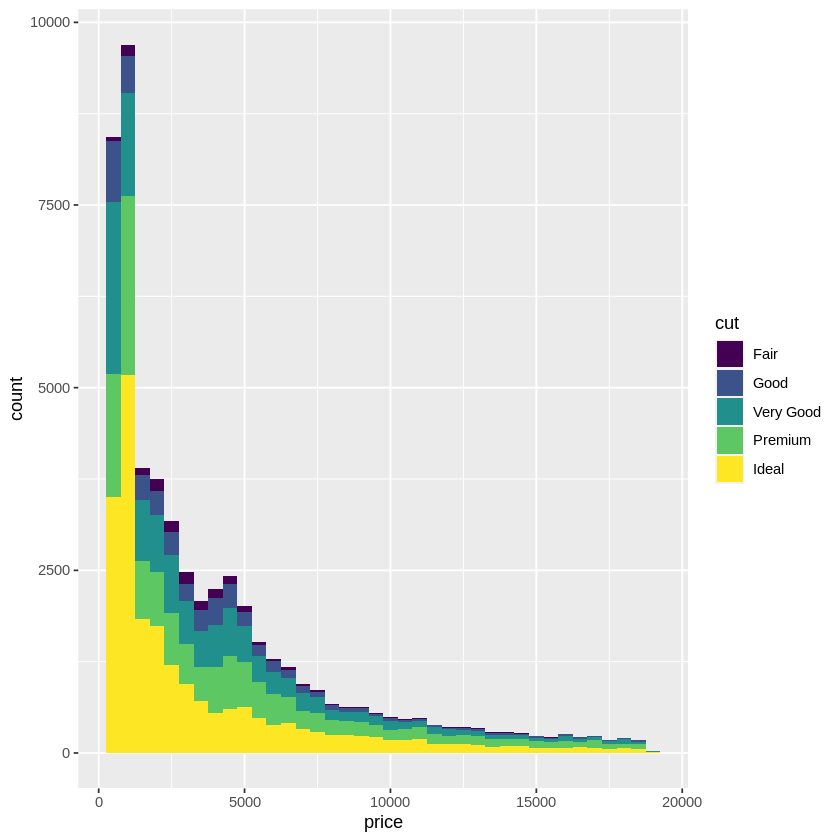

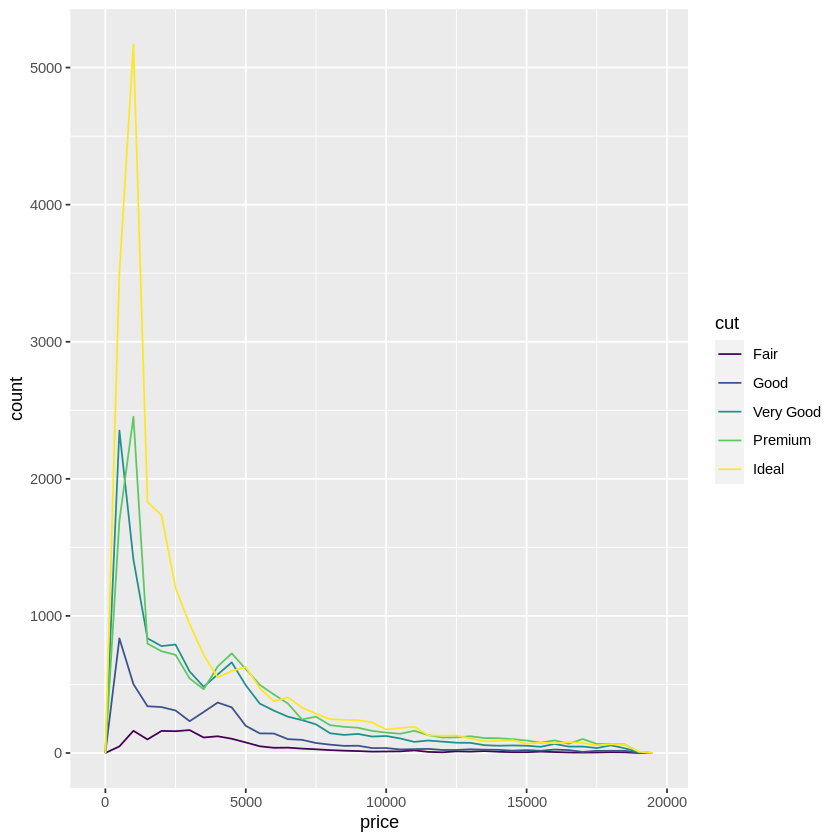

In [34]:
ggplot(diamonds, aes(x = price)) + 
  geom_histogram(aes(fill = cut), binwidth = 500) # w the overlapping, may be hard to see 

ggplot(diamonds, aes(x = price)) + 
  geom_freqpoly(aes(color = cut), binwidth = 500) # freqpoly = same as histogram, but it's a line 

**Question**: how does the smoothness change along with binwidth/bins?

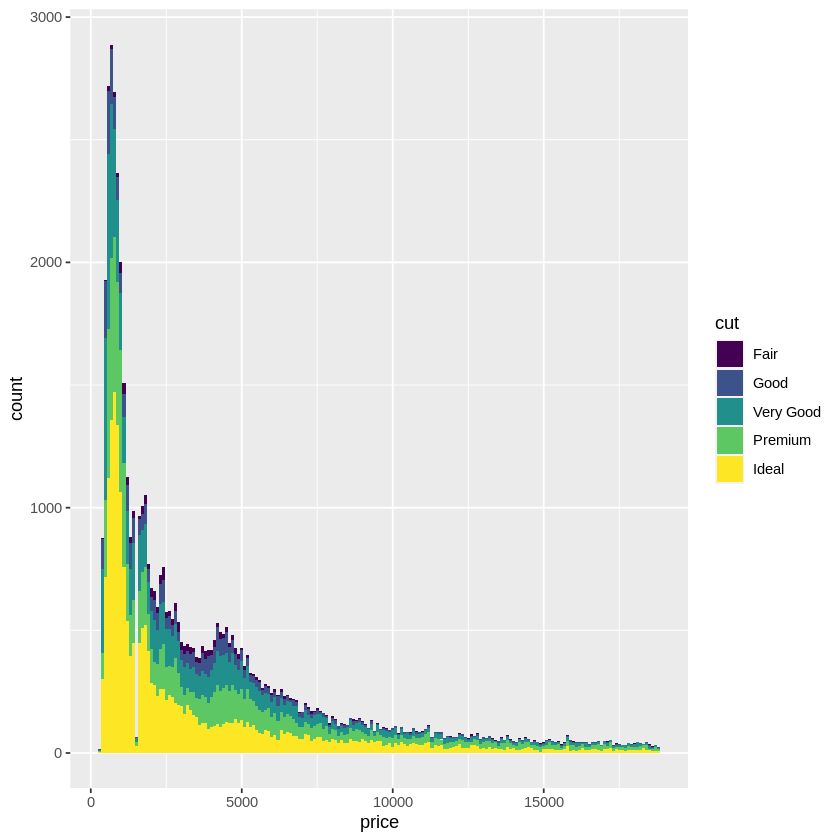

In [35]:
ggplot(diamonds, aes(x = price)) + 
  geom_histogram(aes(fill = cut), binwidth = 100) # smoothness decreases as bindwidth decreases (curly & not smooth)

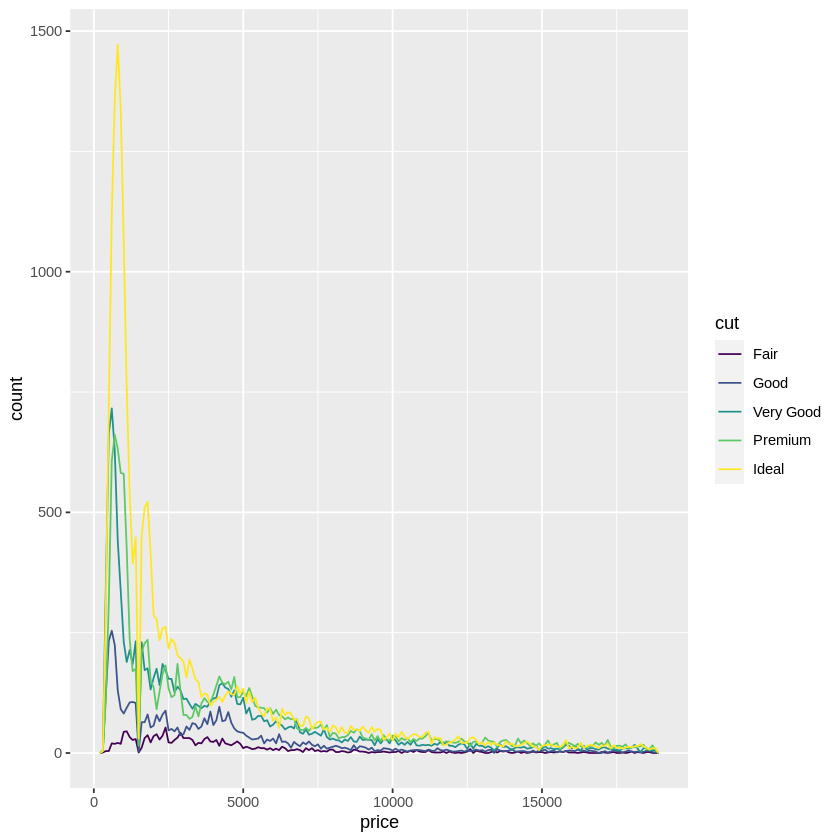

In [37]:
ggplot(diamonds, aes(x = price)) + 
  geom_freqpoly(aes(color = cut), binwidth = 100) # same

Can we say the distribution of prices for different cuts vary a lot? NO!! Because the default height is given by the count and the overall counts of cut in differ so much, making it hard to see the differences in the shapes of their distributions. 

To make the comparison easier, we’ll display the density, which is the count standardized so that the area under each frequency polygon is one. We use the function `after_stat()` to map and calculate the density.

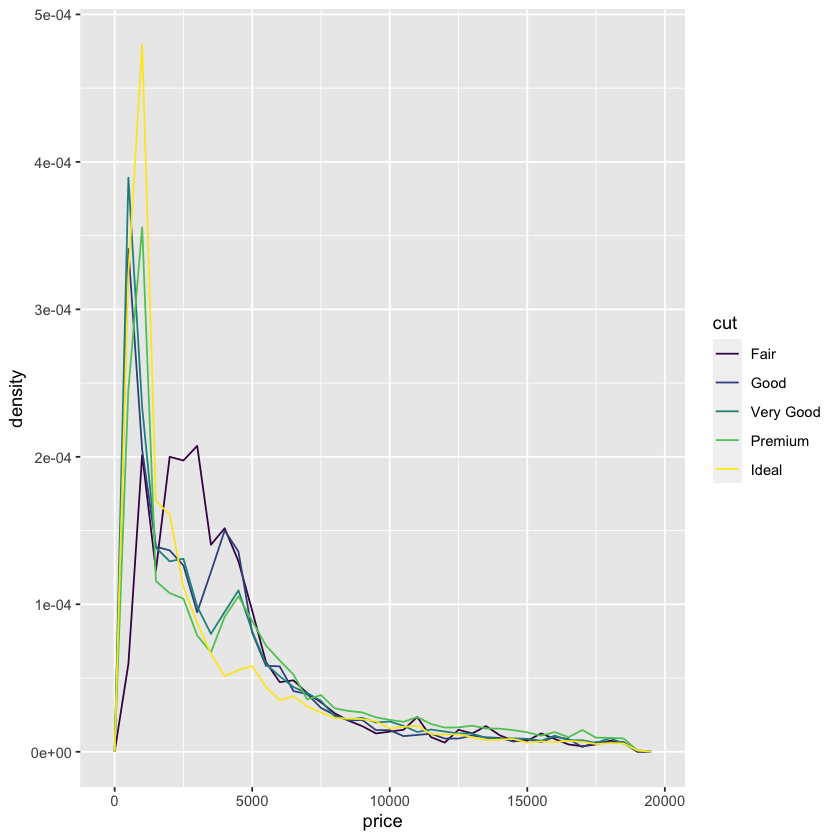

In [ ]:
ggplot(diamonds, aes(x = price, y = after_stat(density))) + 
  geom_freqpoly(aes(color = cut), binwidth = 500)

A visually simpler plot for exploring this relationship is using side-by-side boxplots.

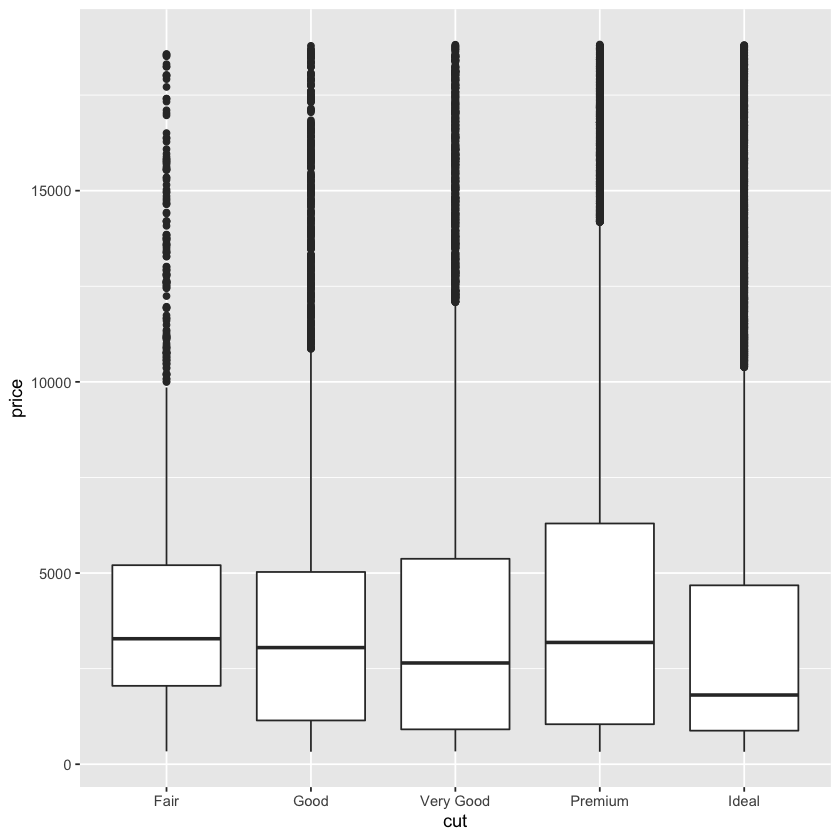

In [ ]:
# this q is similar to old hw q 
ggplot(diamonds, aes(x = cut, y = price)) +
  geom_boxplot()

The order of these boxes are not fixed. You can always reorder them to make a more informative display. 
* `scale_x_discrete()` or `scale_y_discrete()`
* `fct_reorder()`

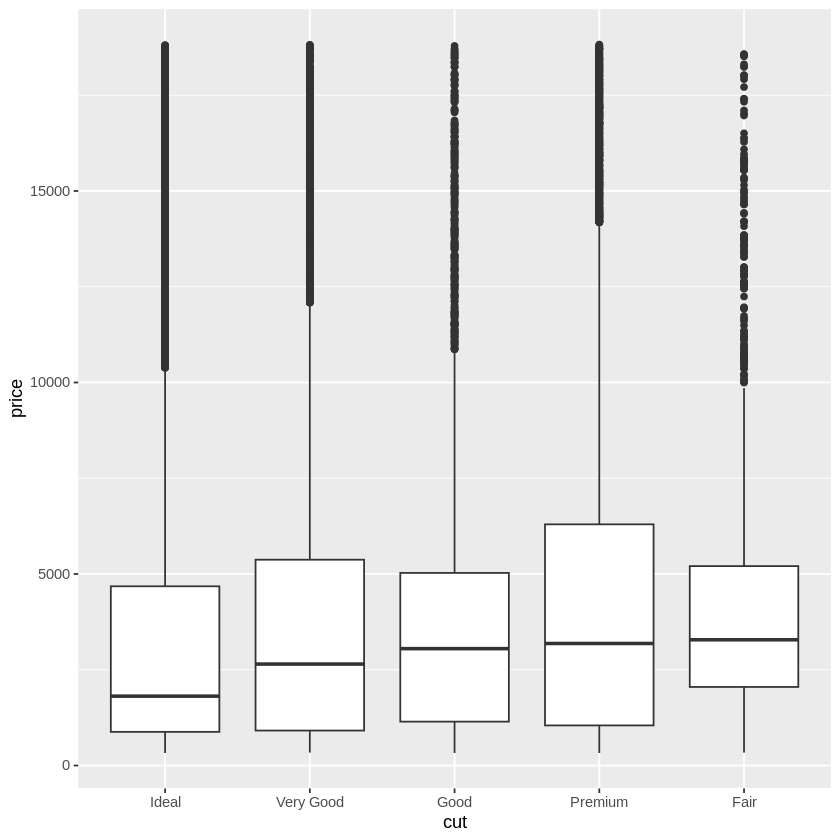

In [38]:
ggplot(diamonds, aes(x = cut, y = price)) +
  geom_boxplot() +
  scale_x_discrete(limits = c("Ideal", "Very Good", "Good", "Premium", "Fair")) # one way to reorder the cut groups. con of this: 10k cut groups 

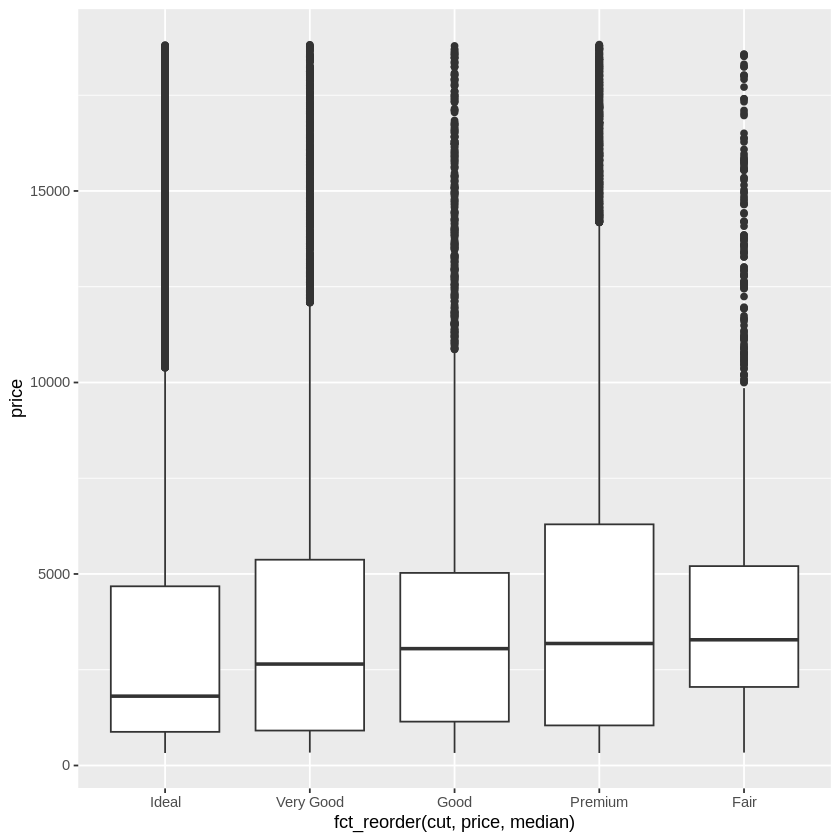

In [39]:
ggplot(diamonds,
       aes(x = fct_reorder(cut, price, median), y = price)) + # another way to reorder the cut groups. i want to reorder the cut based on the price value, based on median
  geom_boxplot()
# fct_reorder(the x-variable you want to use, based on which value you want to order the boxes, criteria)

#### Exercise 2: 
Compare diamonds' width among different clarity using boxplot, and reorder the boxes based on each group's average width in descending order.

clarity,width_mean
<ord>,<dbl>
I1,6.709379
SI2,6.397826
SI1,5.888256
VS2,5.658859
VS1,5.581828
VVS2,5.232118
IF,4.989827
VVS1,4.975075


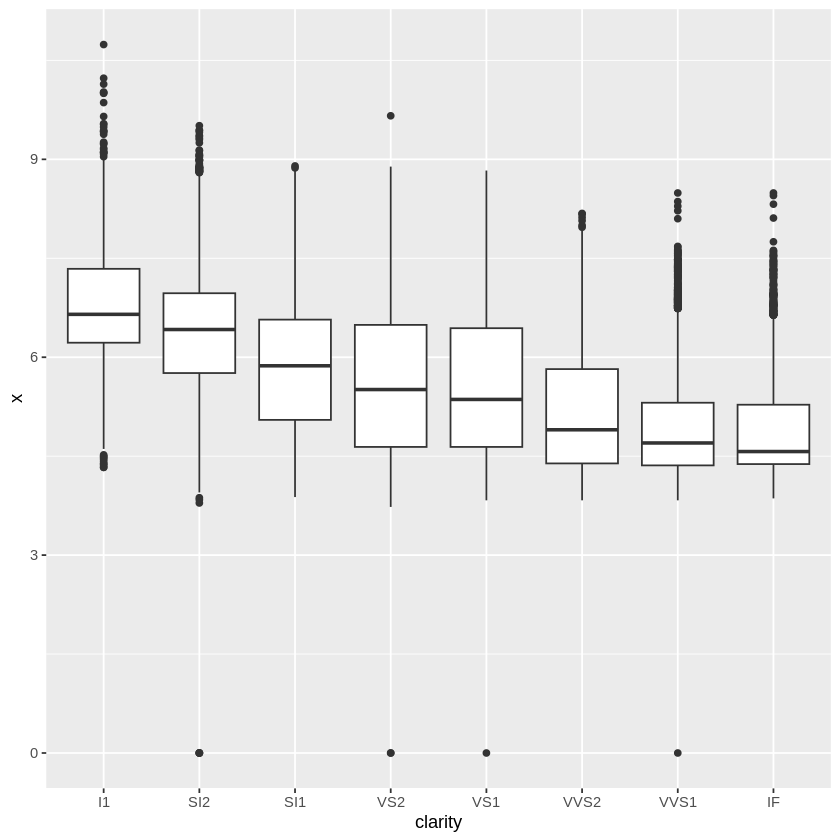

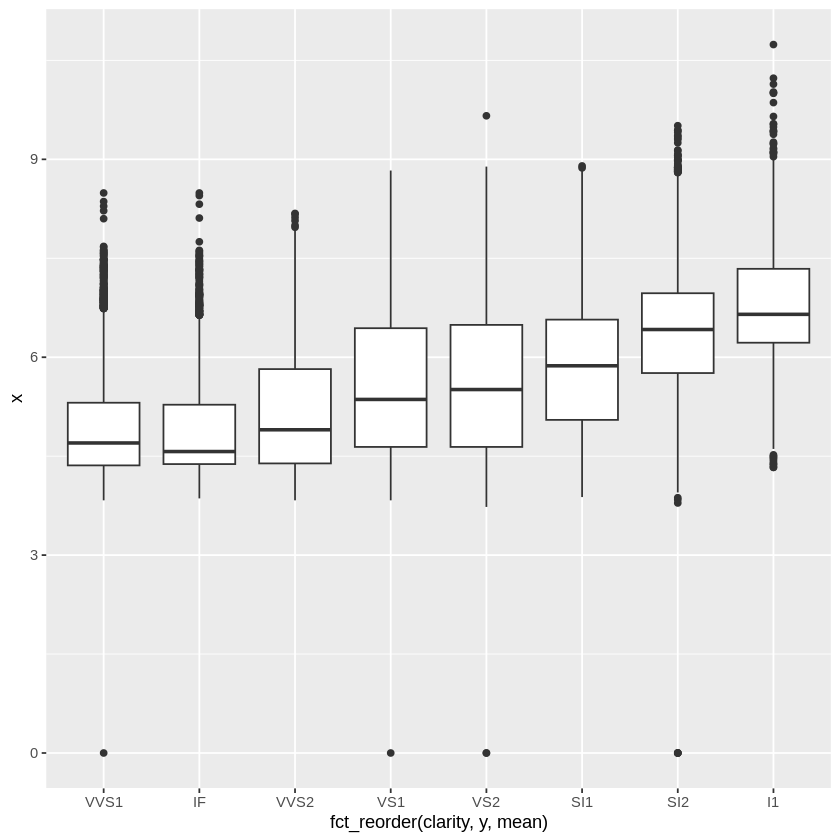

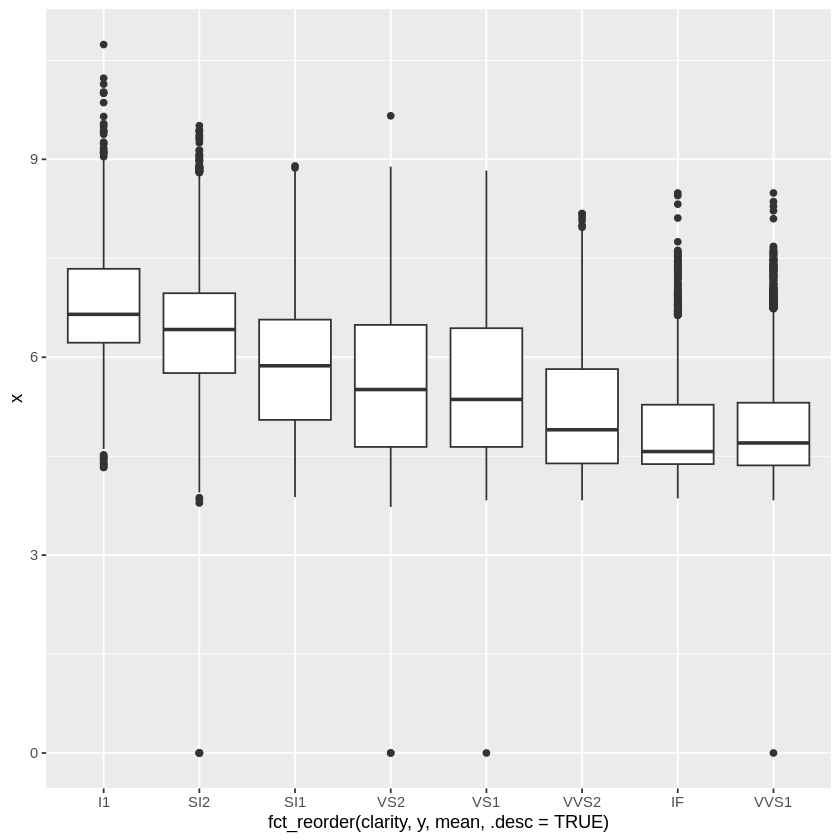

In [44]:
#@title Answer to Exercise 2
diamonds %>% 
  group_by(clarity) %>% summarize(width_mean = mean(y)) %>% 
  arrange(desc(width_mean)) # notice the default order is ascendings

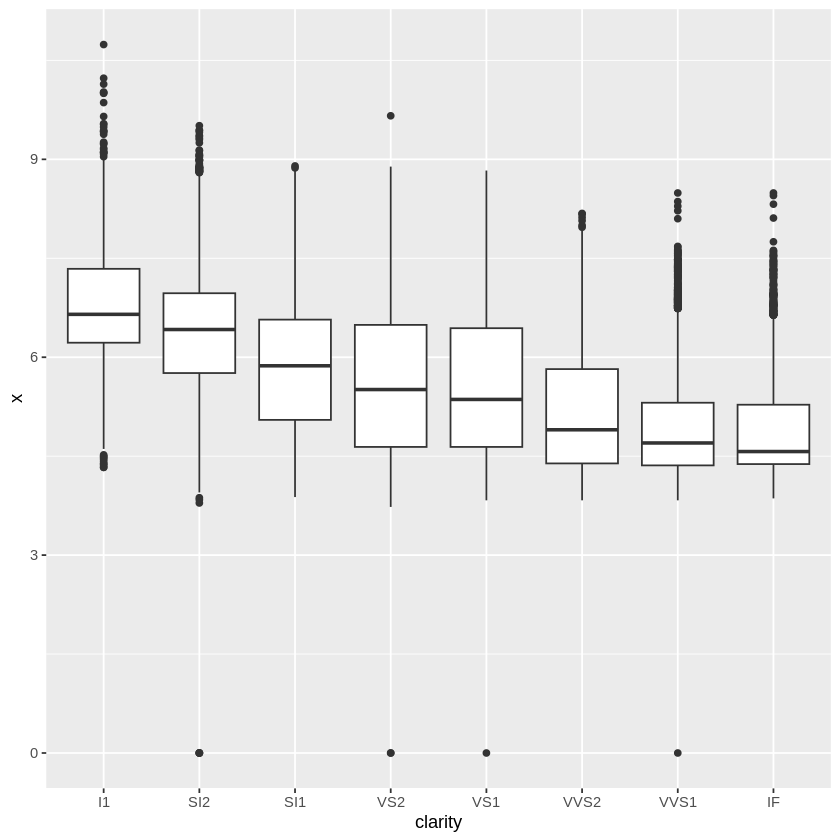

In [45]:
ggplot(diamonds,aes(x=clarity,y=x))+
  geom_boxplot()

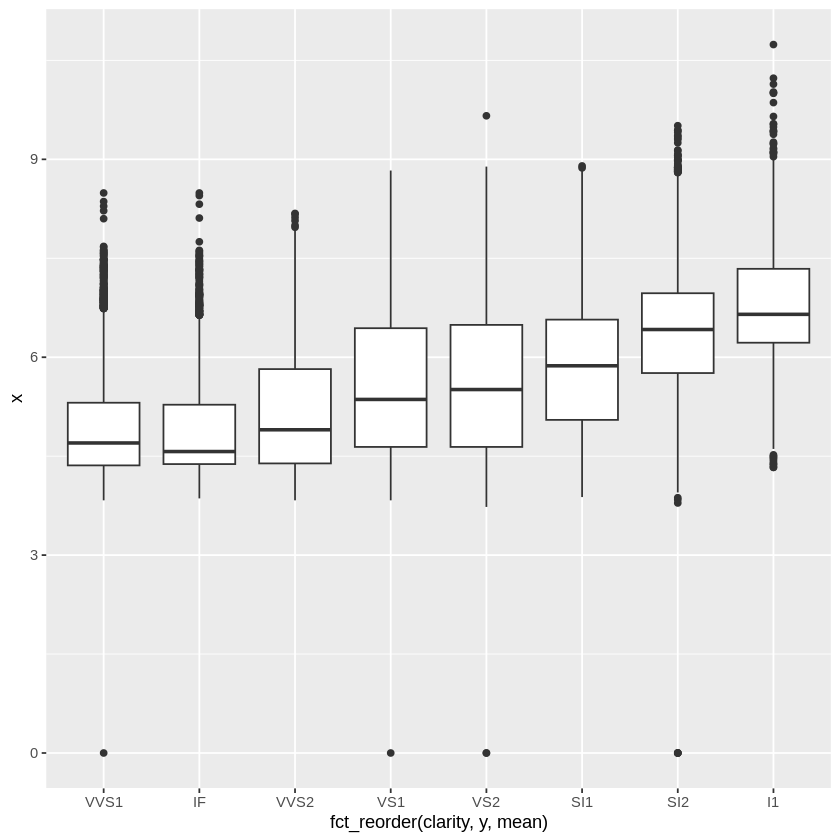

In [46]:
ggplot(diamonds,aes(x=fct_reorder(clarity,y,mean),y=x))+ # we want to reorder the groups based on clarity 
  geom_boxplot()

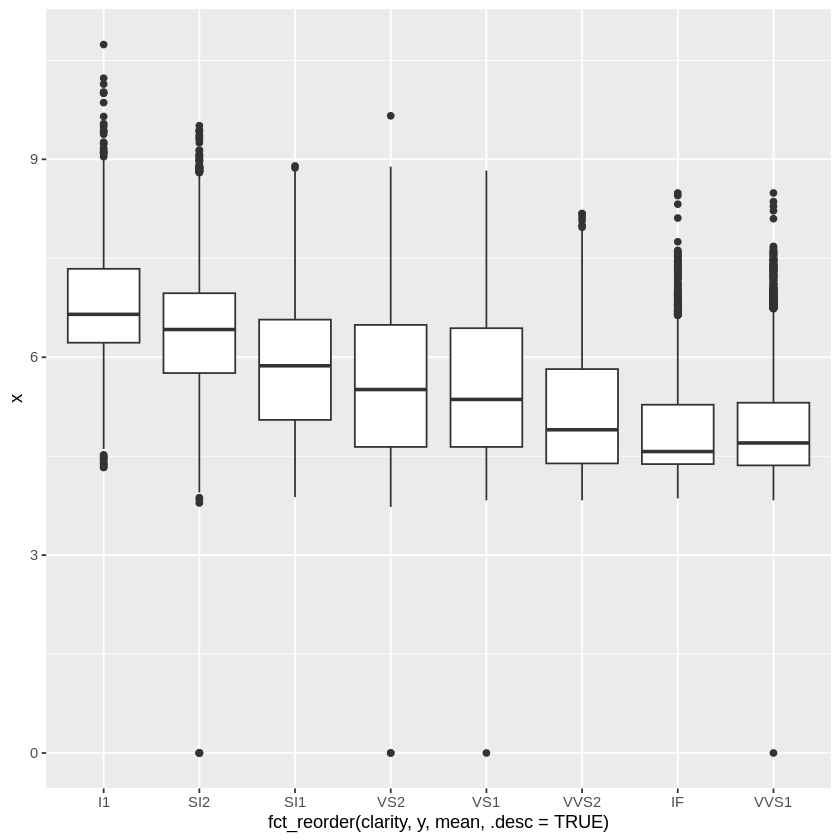

In [47]:
ggplot(diamonds,aes(x=fct_reorder(clarity,y,mean,.desc=TRUE),y=x))+ # we want descending order
  geom_boxplot()

**2. Two categorical variables**

To visualize the covariation between categorical variables, you’ll need to count the number of observations for each combination of levels of these categorical variables. 

* `geom_count()`
* `geom_tile()`

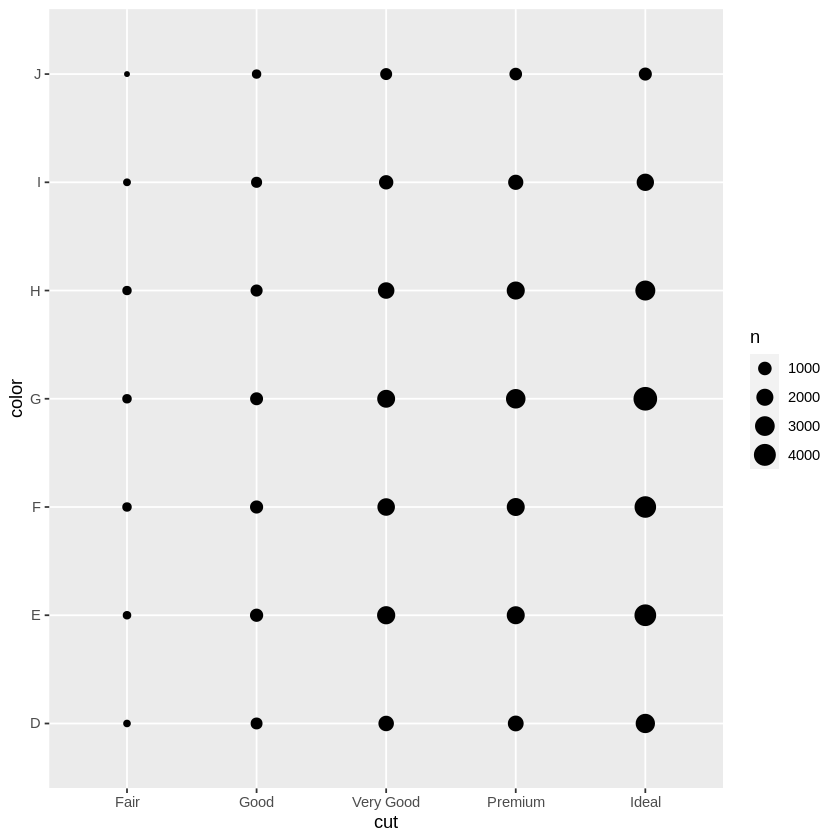

In [48]:
ggplot(diamonds, aes(x = cut, y = color)) +
  geom_count() # same as summarize(n())

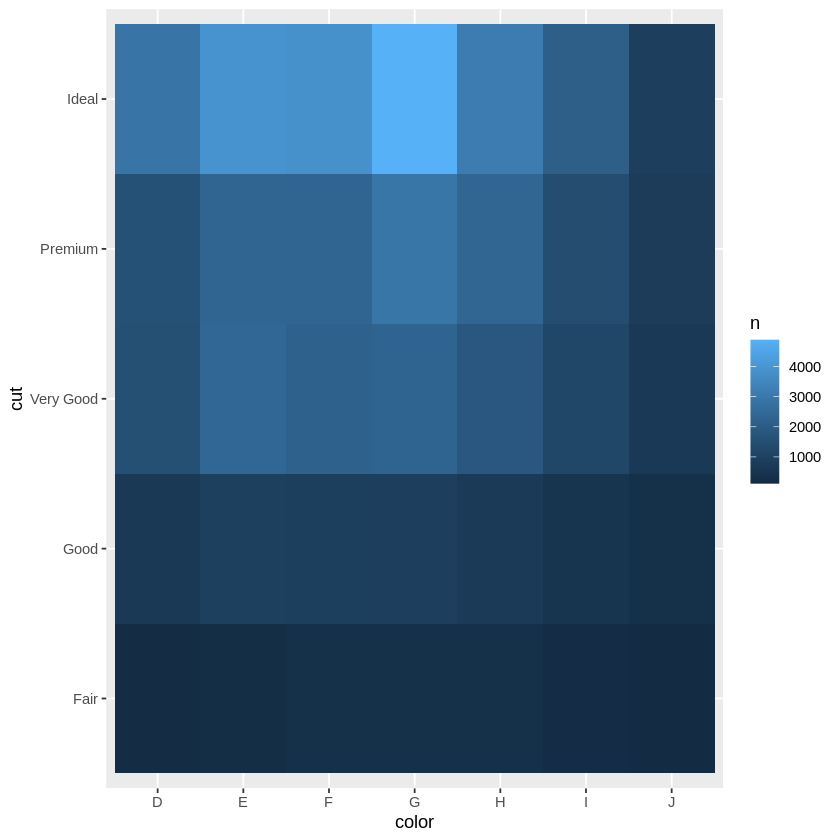

In [49]:
# this is a heat map
diamonds %>% count(color, cut) %>% 
  ggplot(aes(x = color, y = cut, fill = n)) + # we need to specify what the fill/n is here, unlike the graph above 
  geom_tile() 
# notice n here is the default name given by count() function. 

**3. Two numerical variables**

`geom_point()`:  You can see covariation as a pattern in the points. Scatterplots become less useful as the size of your dataset grows, because points begin to overplot, and pile up into areas of uniform black. But using transparency can be challenging for very large datasets.

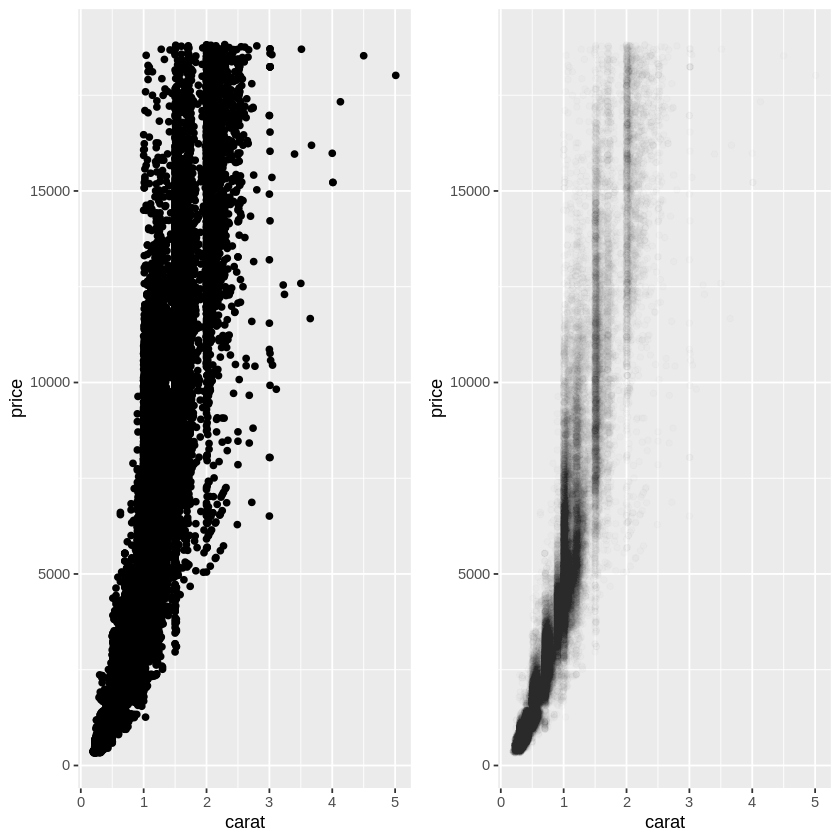

In [51]:
p1 = ggplot(diamonds, aes(x = carat, y = price)) +
  geom_point()

p2 = ggplot(diamonds, aes(x = carat, y = price)) + 
  geom_point(alpha = 1 / 100)

grid.arrange(p1, p2, ncol = 2) # allows us to arrange our ggplot 

## Layers

A deeper dive into aesthetic mappings, geometric objects, and facets.

**1. We can specify different data for each layer.**

Here, we use red points as well as open circles to highlight outliers as we have seen before. The local data argument in `geom_point()` overrides the global data argument in `ggplot()` for that layer only.

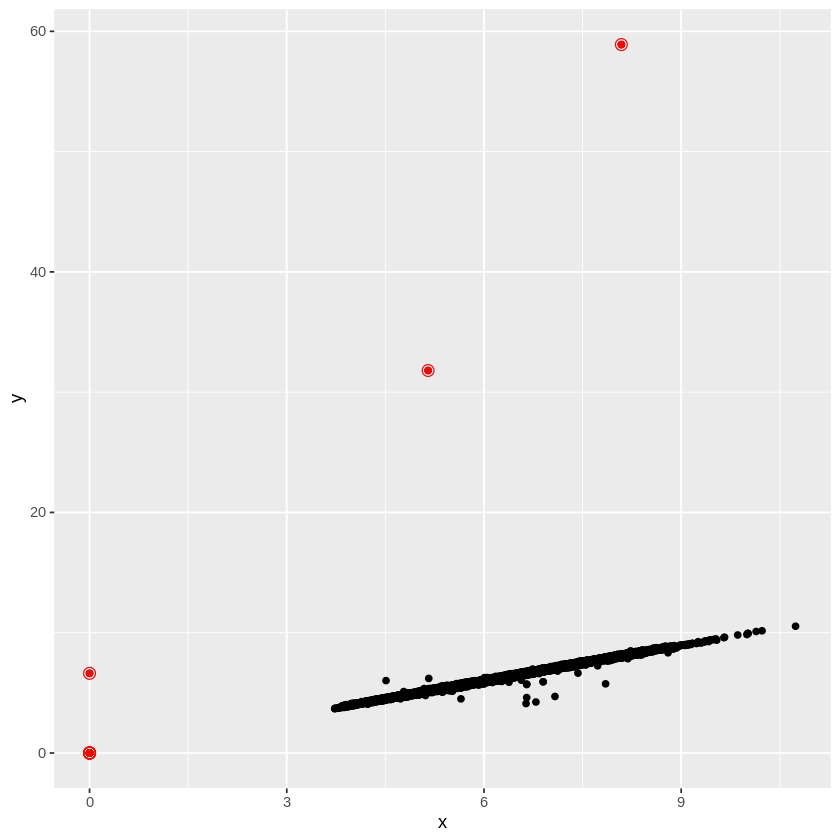

In [53]:
ggplot(diamonds, aes(x = x, y = y)) + 
  geom_point() + 
  geom_point(
    data = diamonds %>% filter(x<3 | y>20), 
    color = "red" # specifies specific data & makes them red 
  ) +
  geom_point(
    data = diamonds %>% filter(x<3 | y>20), 
    shape = "circle open", size = 3, color = "red"
  )
# highlights the outliers 

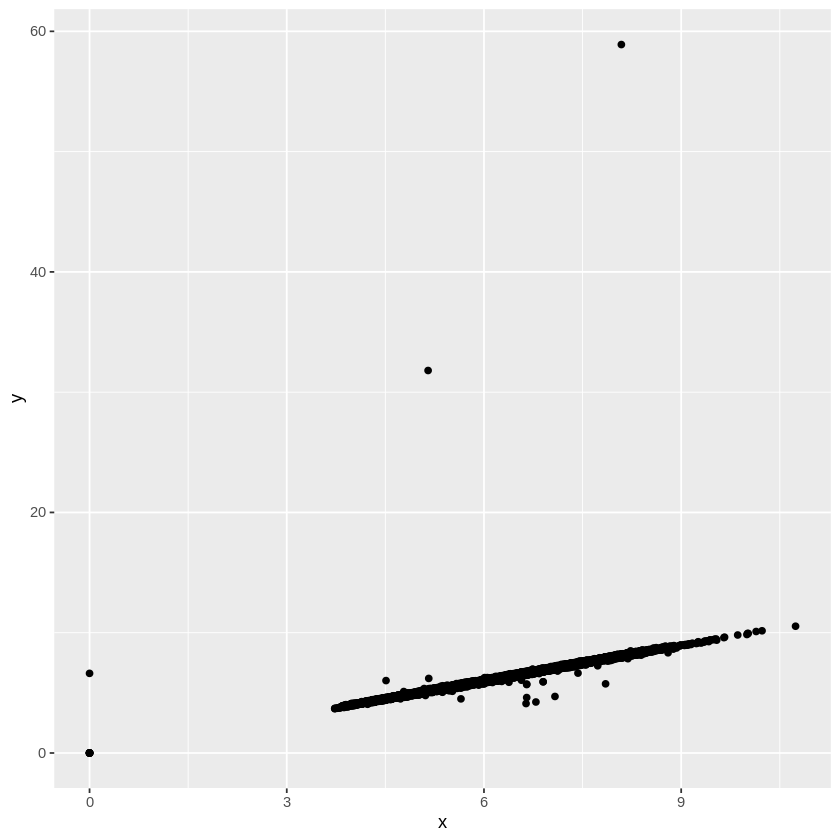

In [54]:
# step by step
ggplot(diamonds, aes(x = x, y = y)) + 
  geom_point() # creates all the dots in black 

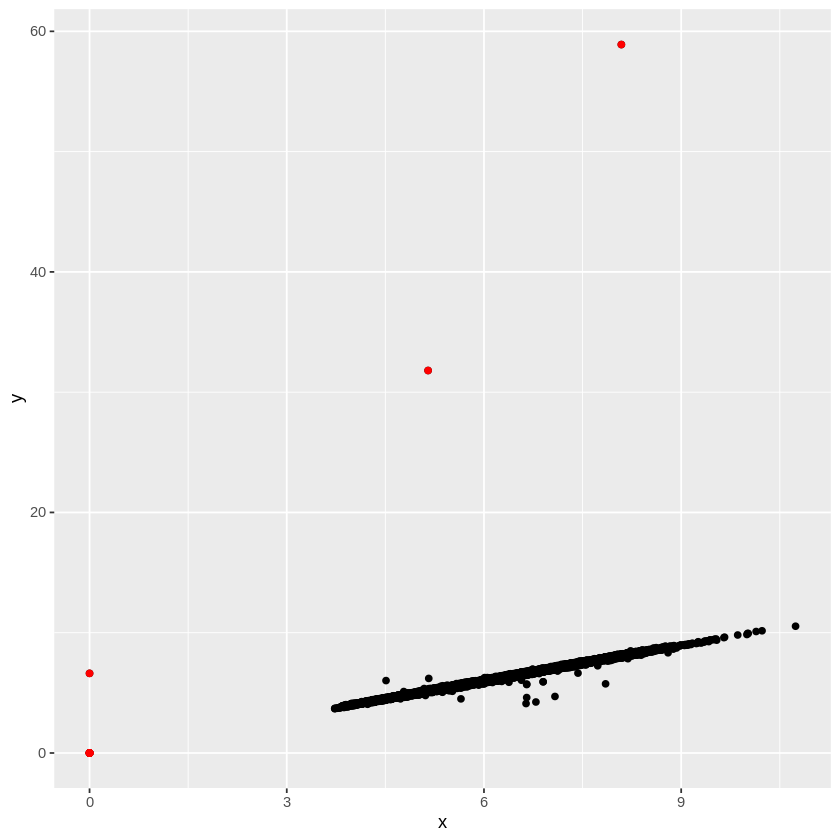

In [55]:
ggplot(diamonds, aes(x = x, y = y)) + 
  geom_point() + 
  geom_point(
    data = diamonds %>% filter(x<3 | y>20), 
    color = "red" 
  ) # makes the outliers red 

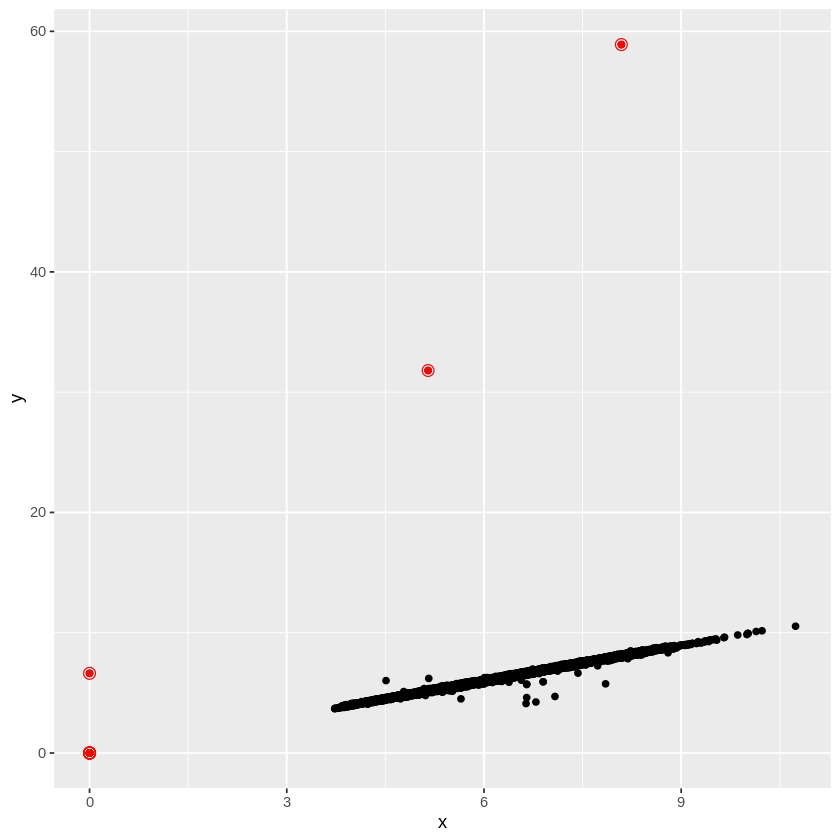

In [56]:
ggplot(diamonds, aes(x = x, y = y)) + 
  geom_point() + 
  geom_point(
    data = diamonds %>% filter(x<3 | y>20), 
    color = "red" 
  ) +
  geom_point(
    data = diamonds %>% filter(x<3 | y>20), 
    shape = "circle open", size = 3, color = "red"
  ) # changes shape & size of points 

#### Exercise 3: 
Make a scatterplot between diamonds' width (colname is y) and price. Highlight points with width==0 in shape square and color red; and highlight points with width>20 in color orange.

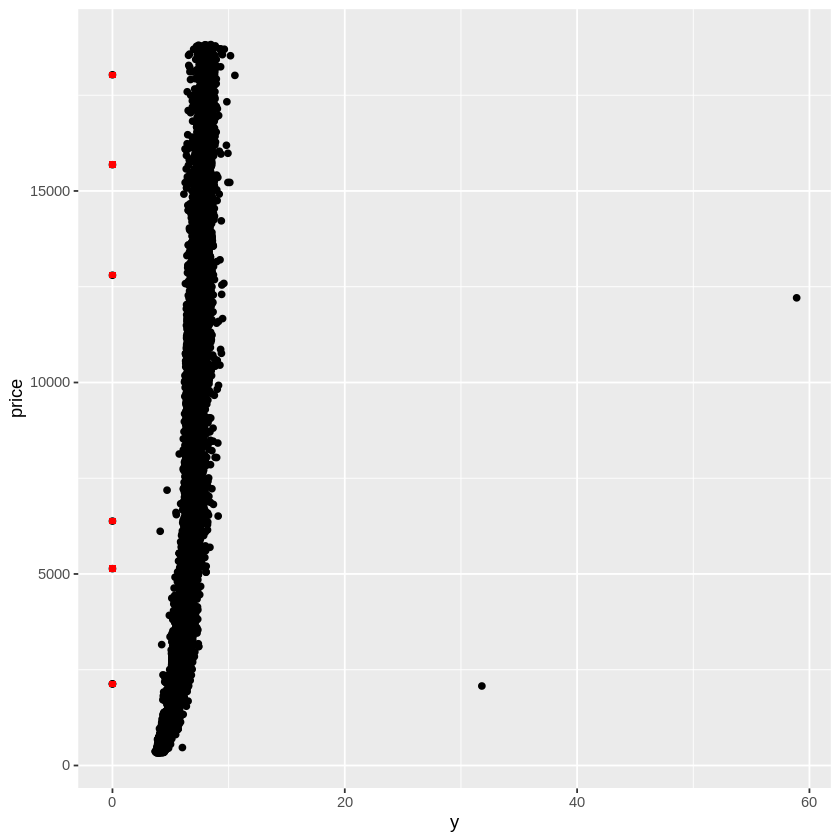

In [60]:
#@title Answer to Exercise 3
ggplot(diamonds,aes(x=y,y=price))+
  geom_point()+
  geom_point(data=diamonds%>%filter(y==0),shape="square",color="red") 

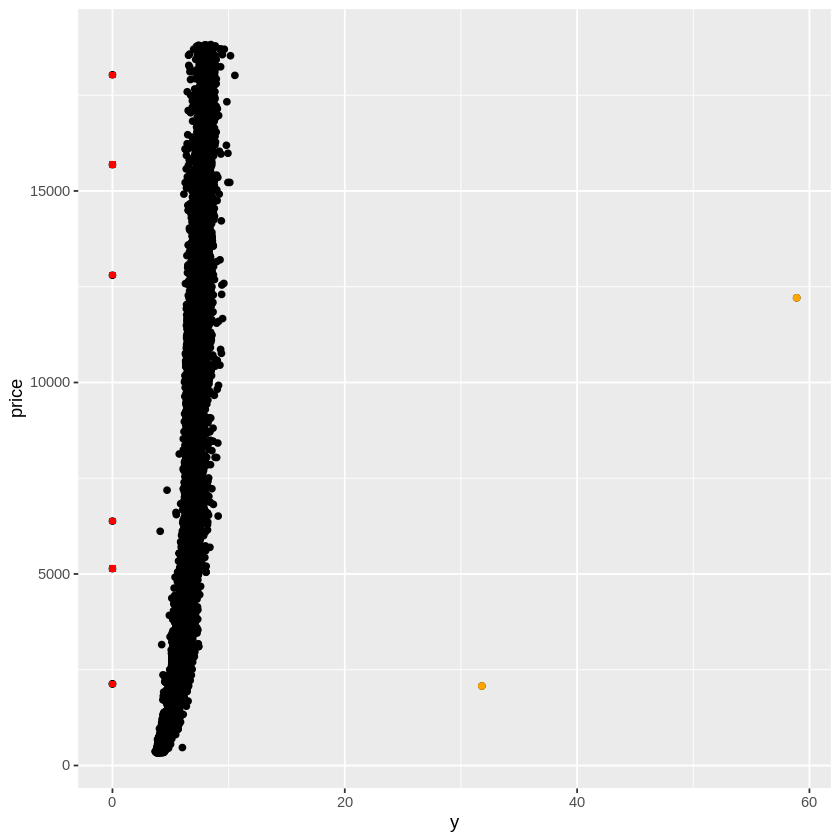

In [61]:
ggplot(diamonds,aes(x=y,y=price))+
  geom_point()+
  geom_point(data=diamonds%>%filter(y==0),shape="square",color="red")+
  geom_point(data=diamonds%>%filter(y>20),color="orange")

**2. Facets**
* `facet_wrap()`: splits a plot into subplots that each display one subset of the data based on a categorical variable.
* `facet_grid()`: facet your plot with the combination of two variables. It needs a double sided formula: rows ~ cols.

By default each of the facets share the same scale for x and y axes. This is useful when you want to compare data across facets but it can be limiting when you want to visualize the relationship within each facet better. `scales = "free"` will allow for different axis scales across both rows and columns.

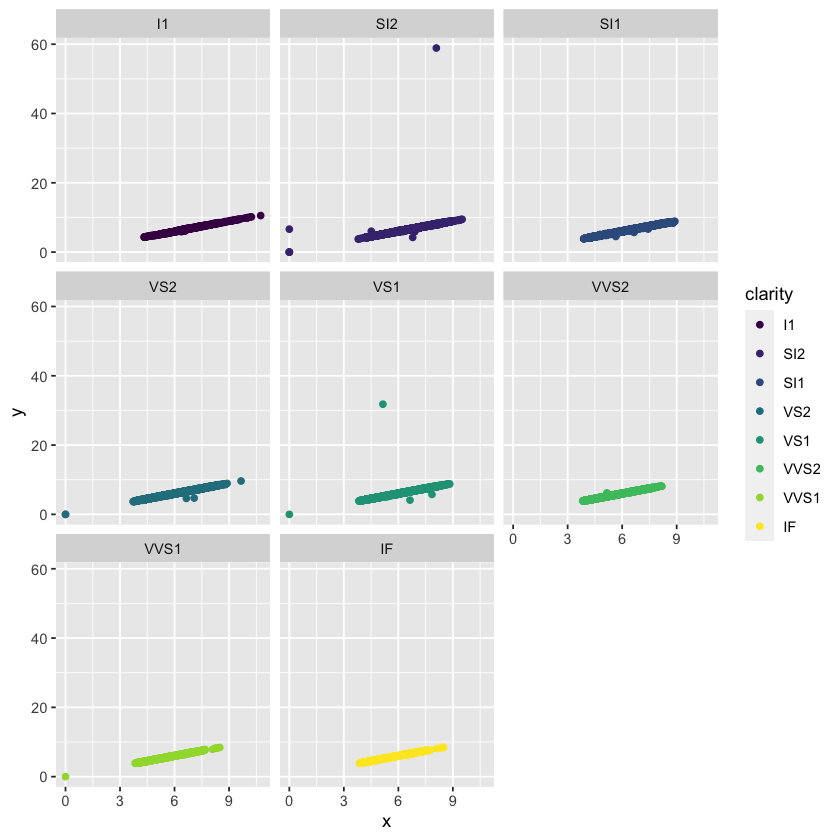

In [ ]:
ggplot(diamonds, aes(x = x, y = y, color = clarity)) + 
  geom_point() +
  facet_wrap(~clarity)

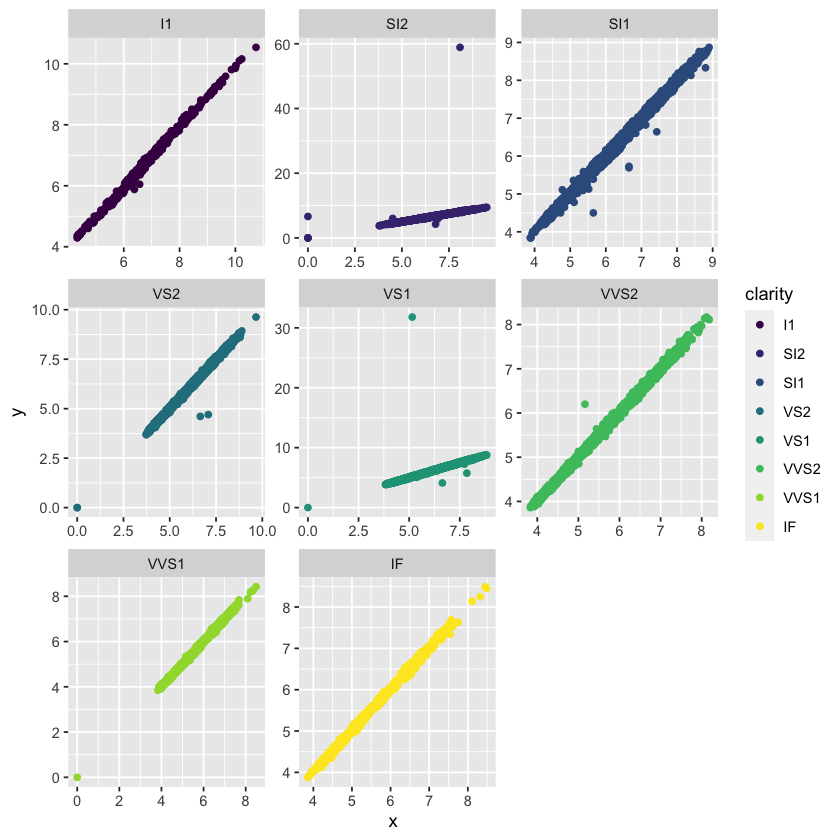

In [ ]:
ggplot(diamonds, aes(x = x, y = y, color = clarity)) + 
  geom_point() +
  facet_wrap(~clarity, scales = 'free')

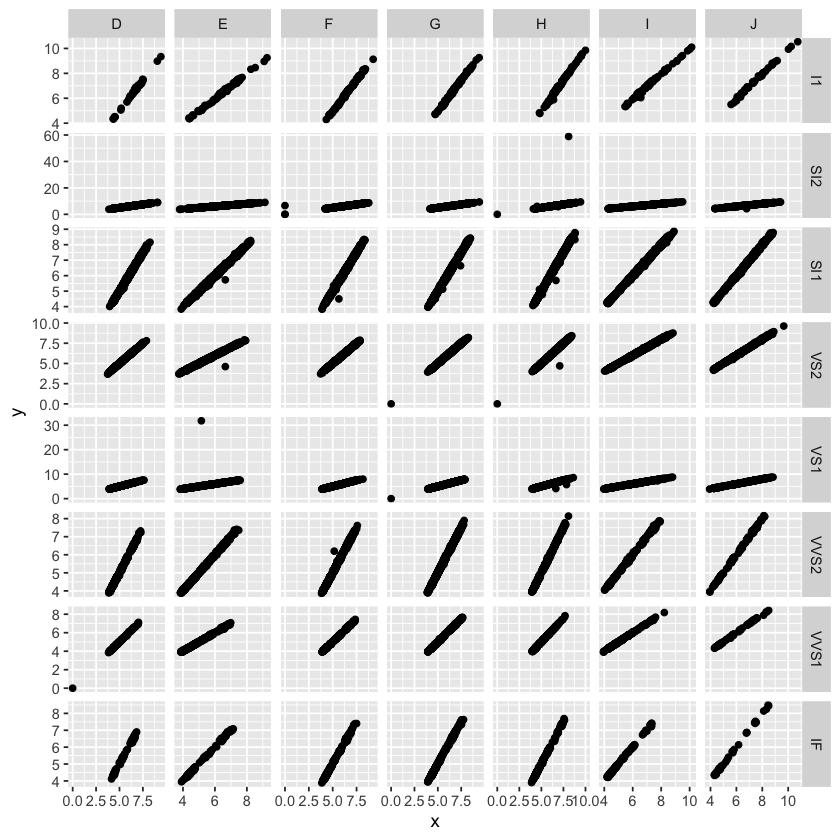

In [ ]:
ggplot(diamonds, aes(x = x, y = y)) + 
  geom_point() + 
  facet_grid(clarity~color , scales = "free") # number of subplots = number of clarity types * number of color types

#### Exercise 4: 
Make a density plot for each cut subset in dataset diamonds.

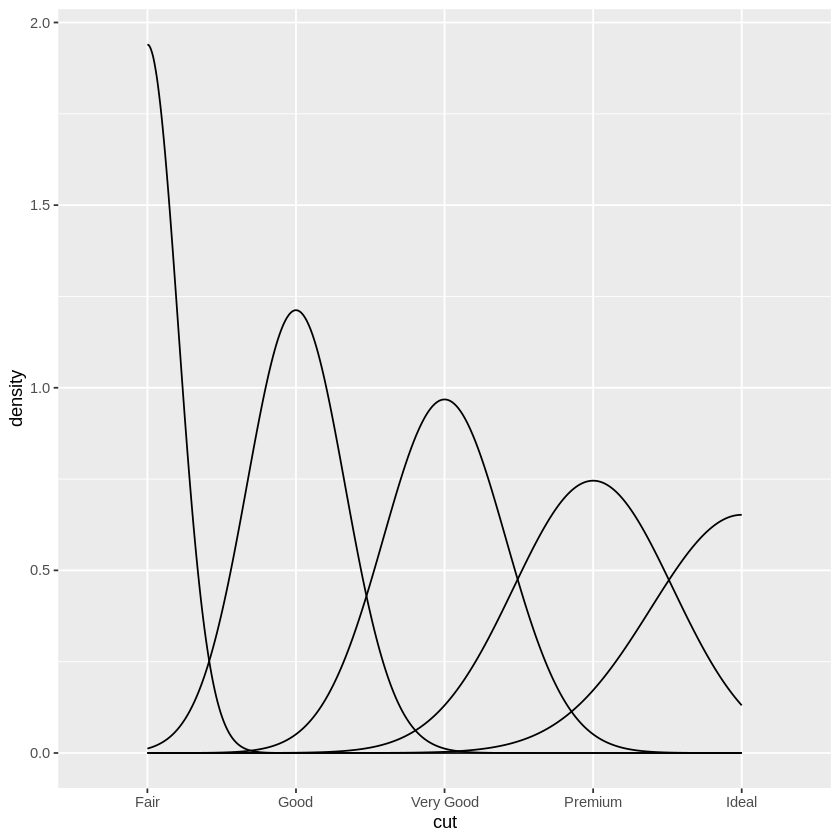

In [63]:
#@title Answer to Exercise 4
ggplot(diamonds,aes(x=cut))+
  geom_density() # density plots for all cuts 

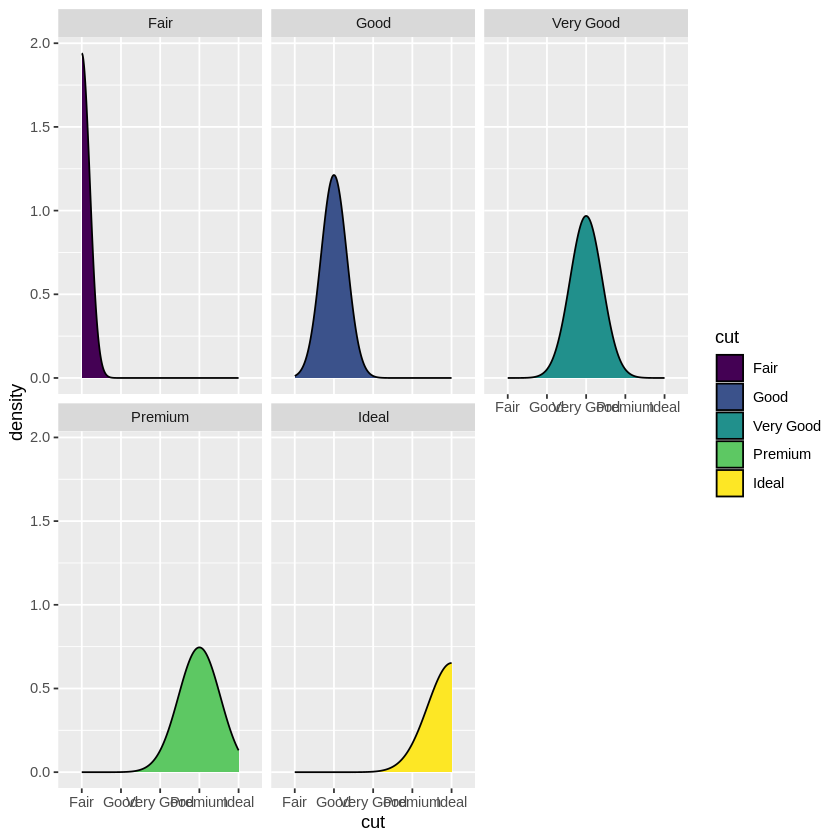

In [65]:
ggplot(diamonds,aes(x=cut,fill=cut))+ # diff color for each cut too 
  geom_density()+
  facet_wrap(~cut) # subplot for each cut
# geom_density, histogram, barplot don't have y-value by default (would be count or density)

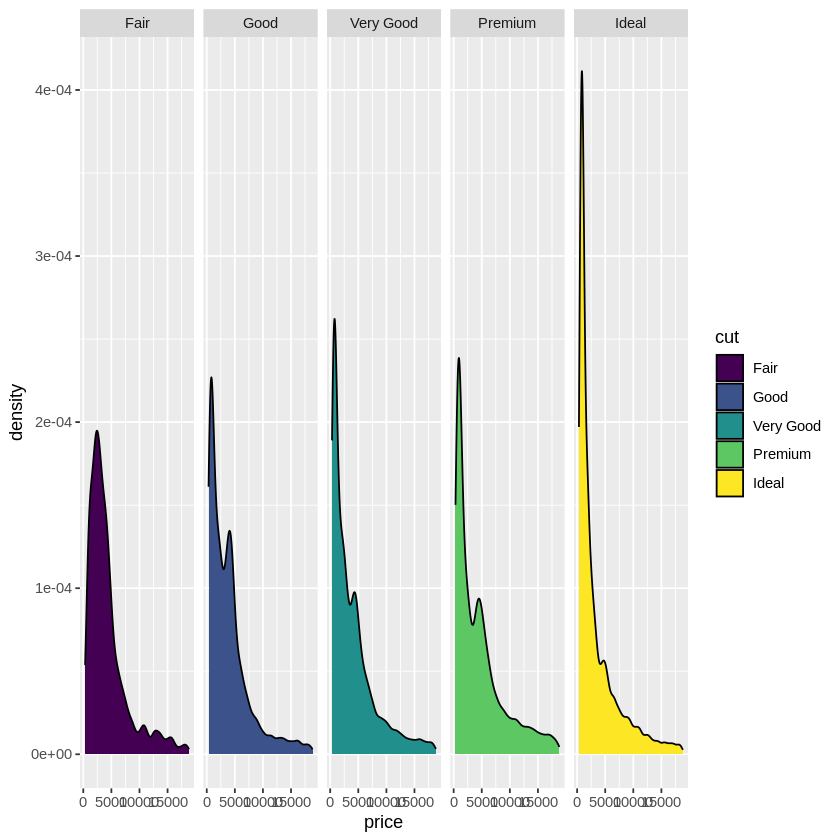

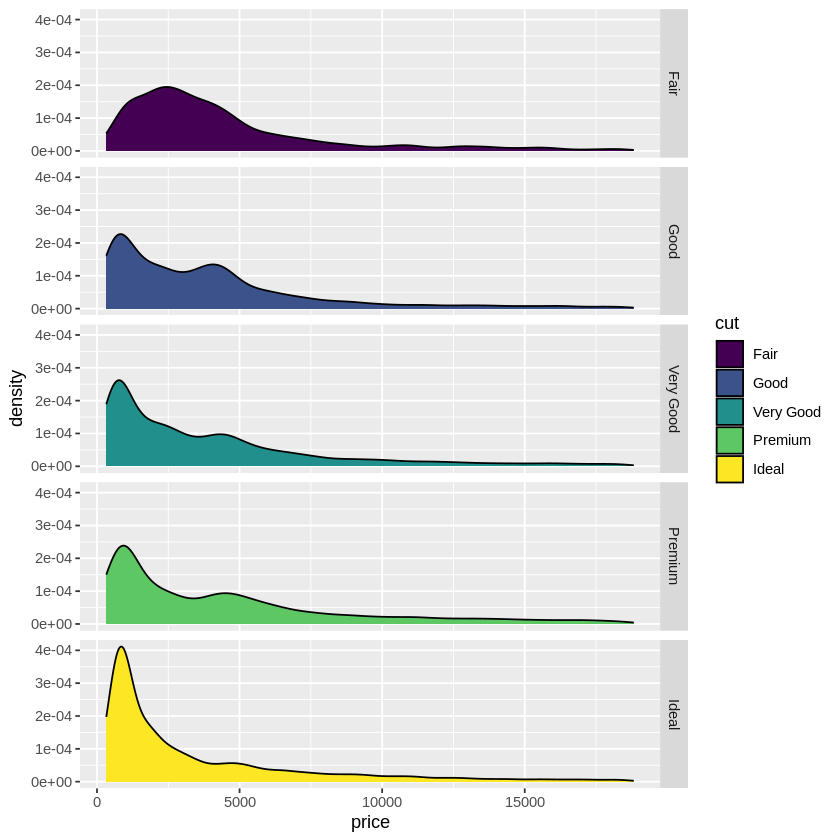

In [66]:
ggplot(diamonds, aes(price, fill = cut)) + 
  geom_density() +
  facet_grid(.~cut)

ggplot(diamonds, aes(price, fill = cut)) + 
  geom_density() +
  facet_grid(cut~.)

# the plots are the same, but the layouts are diff 

Discussion: What's the difference among the above three plots?

**3. Coordinate Systems**

The default coordinate system is the Cartesian coordinate system where the x and y positions act independently to determine the location of each point. There are two other coordinate systems that are occasionally helpful.

* `coord_quickmap()` sets the aspect ratio correctly for maps.

* `coord_polar()` uses polar coordinates.

In [70]:
install.packages('maps')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [71]:
library(maps)


Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map




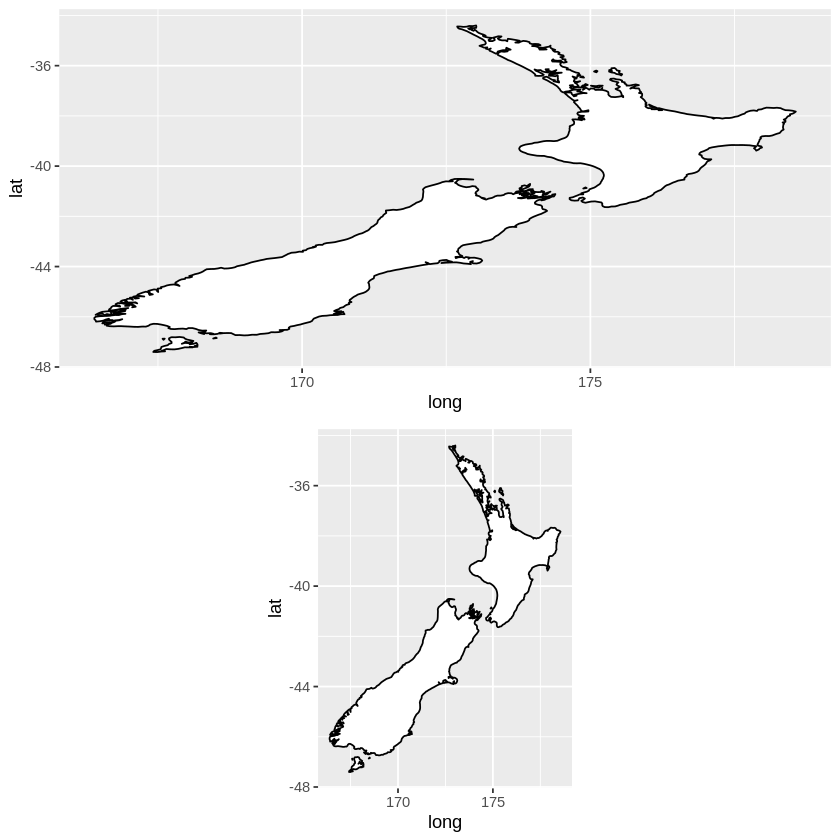

In [72]:
nz <- map_data("nz")

p1 = ggplot(nz, aes(x = long, y = lat, group = group)) +
  geom_polygon(fill = "white", color = "black")

p2 = ggplot(nz, aes(x = long, y = lat, group = group)) +
  geom_polygon(fill = "white", color = "black") +
  coord_quickmap() # this will make the ratio aspect correct automatically for the map 

grid.arrange(p1, p2, ncol = 1)

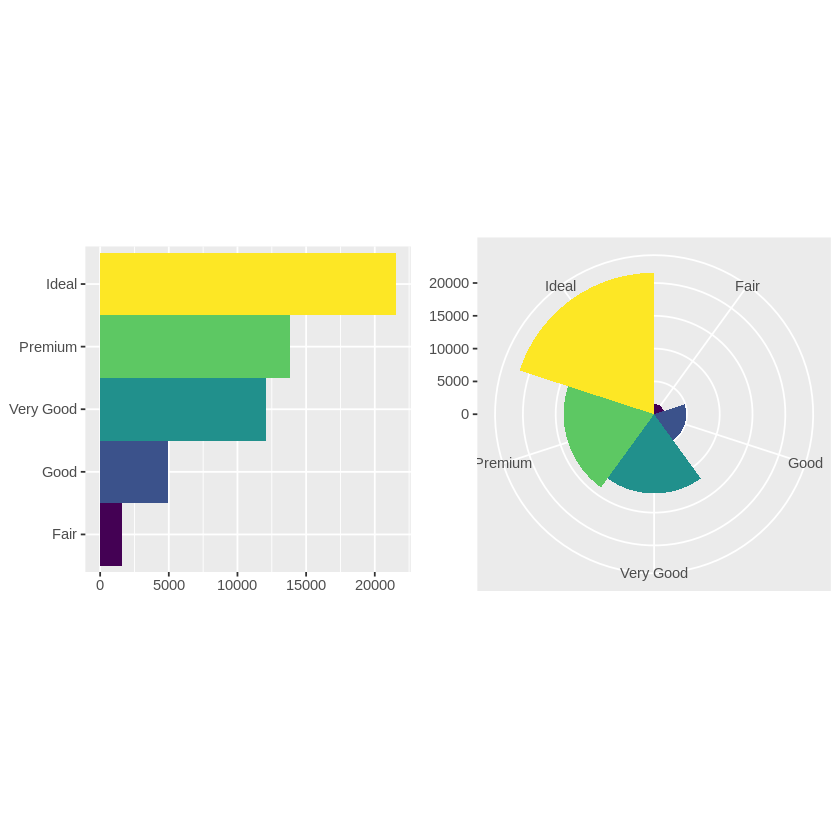

In [73]:
bar <- ggplot(data = diamonds) + 
  geom_bar(
    mapping = aes(x = cut, fill = cut), 
    show.legend = FALSE, # this is how you can hide your legend
    width = 1 # this is similar as what we do in geom_hist(bins/binwidth = ...)
  ) + 
  theme(aspect.ratio = 1) + # figure's height/width
  labs(x = NULL, y = NULL)

p1 = bar + coord_flip()
p2 = bar + coord_polar() # useful for pie charts 

grid.arrange(p1, p2, ncol = 2)

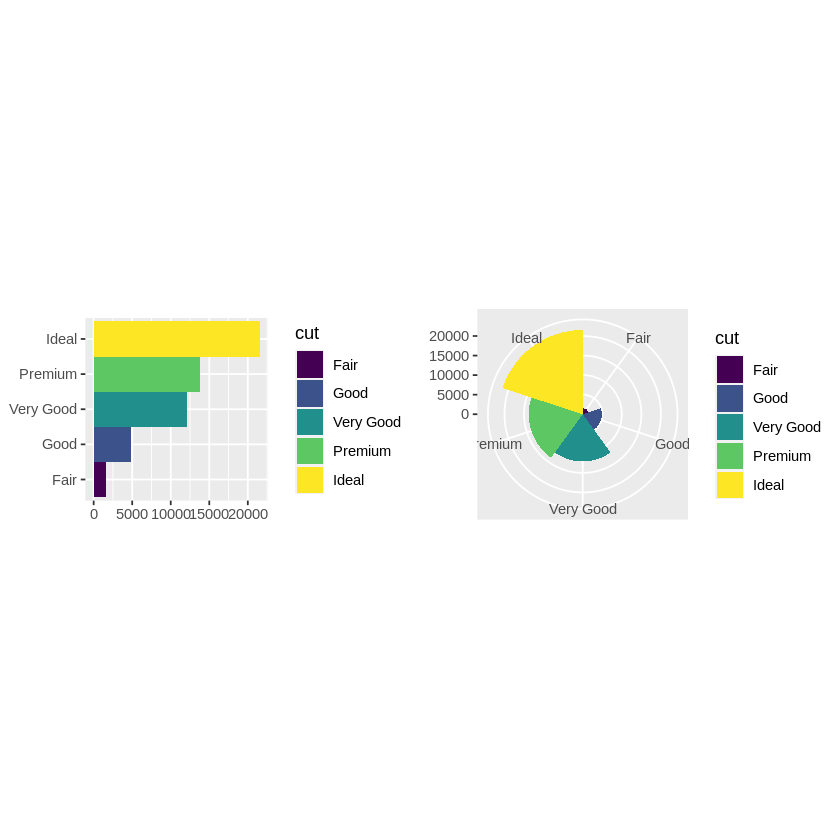

In [75]:
bar <- ggplot(data = diamonds) + 
  geom_bar(
    mapping = aes(x = cut, fill = cut), 
    show.legend = TRUE, # default is to show legend 
    width = 1
  ) + 
  theme(aspect.ratio = 1) + 
  labs(x = NULL, y = NULL) # hides the x and y labels 

p1 = bar + coord_flip()
p2 = bar + coord_polar() 

grid.arrange(p1, p2, ncol = 2)

#### Exercise 5:
Turn a proportional bar plot between cut and clarity into a pie chart.

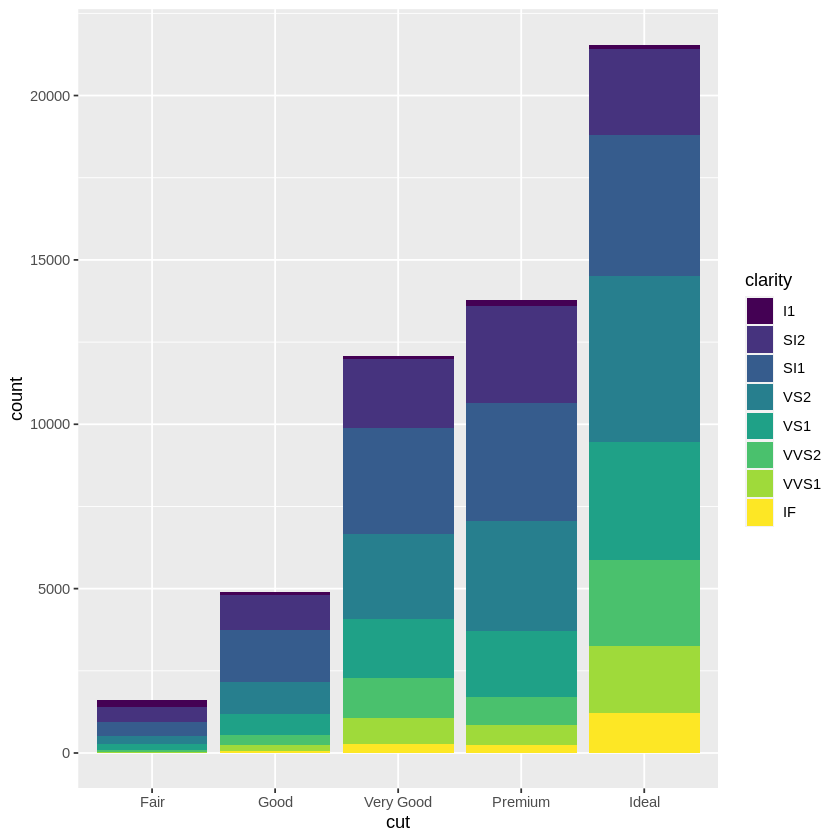

In [76]:
#@title Answer to Exercise 5
# bar plot 
ggplot(diamonds,aes(x=cut,fill=clarity))+
  geom_bar()

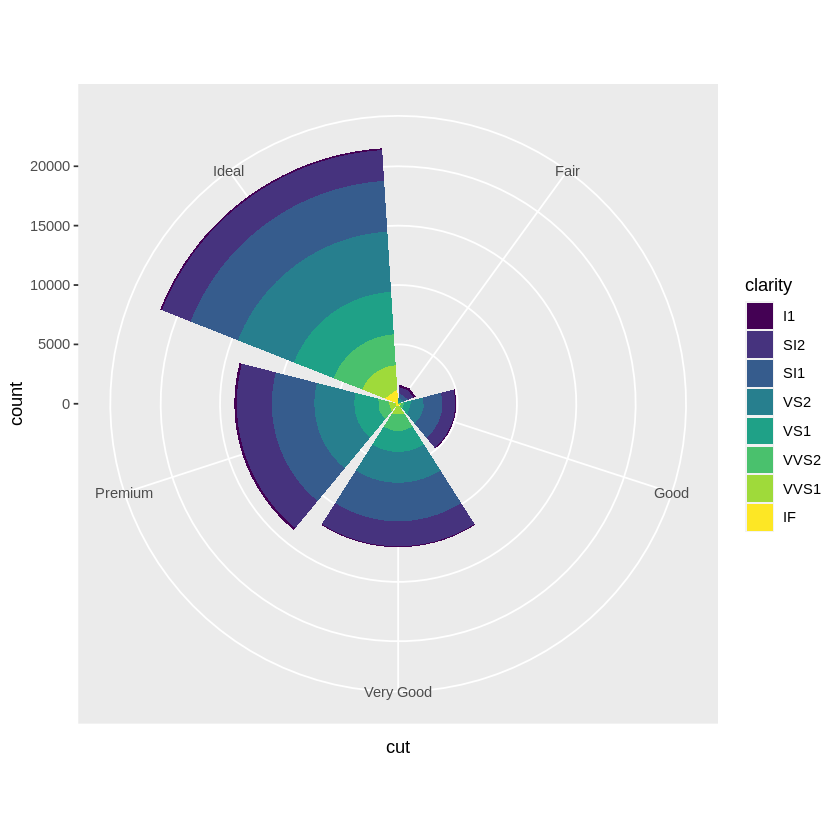

In [77]:
# pie chart 
ggplot(diamonds,aes(x=cut,fill=clarity))+
  geom_bar()+
  coord_polar()

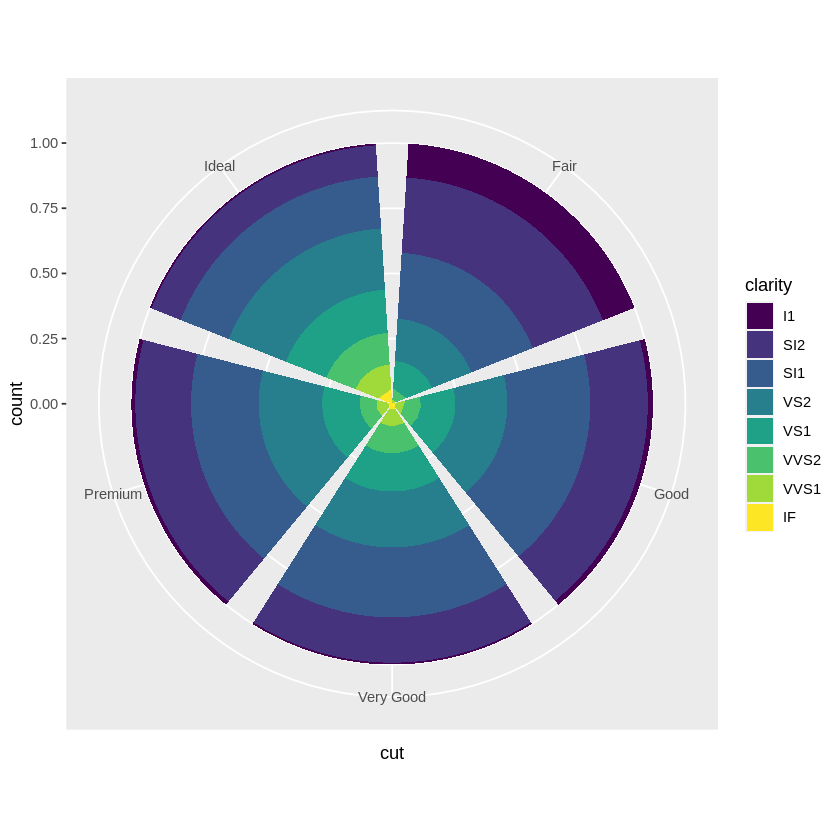

In [78]:
ggplot(diamonds,aes(x=cut,fill=clarity))+
  geom_bar(position='fill')+ # so now the y-axis is equal to 1 (proportion)
  coord_polar()

In [ ]:
ggplot(diamonds,aes(x=cut,fill=clarity))+
  geom_bar(position='dodge')+ # so that the pieces do not overlap 
  coord_polar()